# OV7675 Image Viewer

In [1]:
# Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

In [29]:
# Copy the output of the Serial Monitor to the variable below
HEXADECIMAL_BYTES = [0x93, 0x94, 0x97, 0x96, 0x86, 0x6E, 0x6A, 0x61, 0x68, 0x7C, 0x81, 0x7F, 0x7F, 0x81, 0x7A, 0x73, 0x6A, 0x67, 0x5F, 0x86, 0xBE, 0xC1, 0xC4, 0xB9, 0xAF, 0xCA, 0xC9, 0xBA, 0x98, 0x9A, 0x9B, 0x98, 0x95, 0x64, 0x57, 0x51, 0x5B, 0x5C, 0x5C, 0x5D, 0x51, 0x6C, 0x66, 0x5B, 0x56, 0x4E, 0x55, 0x45, 0x46, 0x41, 0x44, 0x41, 0x3A, 0x66, 0xA3, 0xCB, 0xCA, 0x9E, 0xAD, 0xB5, 0xCA, 0xC8, 0x8B, 0x55, 0x56, 0x5B, 0x5B, 0x60, 0x5E, 0x5B, 0x5C, 0x5B, 0x5B, 0x51, 0x4B, 0x66, 0x7B, 0x88, 0x8C, 0x86, 0x7B, 0x75, 0x5C, 0x57, 0x58, 0x75, 0x59, 0x3F, 0x37, 0x54, 0x96, 0xA0, 0x9C, 0x74, 0x97, 0x99, 0xB1, 0xA0, 0xB6, 0xAE, 0x7A, 0x72, 0x76, 0x64, 0x86, 0x80, 0x8C, 0x95, 0x8C, 0x85, 0x82, 0x7B, 0x6F, 0x6F, 0x60, 0x7F, 0xE9, 0xE2, 0xF8, 0xE4, 0x9C, 0xEA, 0xEB, 0xE0, 0xB5, 0xB8, 0xAF, 0xA7, 0xA9, 0x58, 0x5D, 0x65, 0x66, 0x60, 0x53, 0x5A, 0x57, 0x72, 0x62, 0x57, 0x5B, 0x5A, 0x5C, 0x53, 0x4C, 0x47, 0x58, 0x52, 0x4B, 0x7D, 0xD1, 0xED, 0xEE, 0xA9, 0xE8, 0xD5, 0xED, 0xEC, 0xC3, 0xB4, 0xB8, 0xBA, 0xBC, 0xC4, 0xCE, 0xD7, 0xDC, 0xDA, 0xE3, 0xEA, 0xFB, 0xEB, 0xE5, 0xE2, 0xDF, 0xE3, 0xE3, 0xE6, 0xEB, 0xEC, 0xE4, 0xDB, 0xC4, 0xC8, 0xDC, 0xD1, 0xB8, 0xB8, 0xCA, 0x98, 0xAE, 0xB1, 0xB6, 0xBA, 0xB9, 0xBE, 0xCA, 0xE2, 0xE5, 0xE9, 0xF2, 0xE3, 0xEB, 0xF0, 0xEF, 0xF2, 0xF2, 0xF6, 0xF4, 0xD7, 0xF6, 0xE9, 0xDD, 0xE0, 0xF6, 0xD9, 0xB6, 0xE5, 0xE7, 0xE7, 0xF8, 0xF6, 0xF5, 0xF6, 0xFA, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFE, 0xFF, 0xFF, 0xFF, 0xFE, 0xFF, 0xFF, 0xFF, 0xFE, 0xFE, 0xFE, 0xFE, 0xFB, 0xE7, 0xE8, 0xEA, 0xF3, 0xF2, 0xFA, 0xC4, 0xE2, 0xDB, 0xEE, 0xEF, 0xEC, 0xE9, 0xED, 0xEB, 0xE1, 0xDC, 0xDB, 0xD6, 0xD5, 0xD0, 0xCE, 0xCD, 0xC2, 0xBC, 0xB8, 0xB5, 0xB9, 0xB5, 0xB0, 0xAF, 0xA8, 0xA5, 0xA6, 0xA1, 0x90, 0x86, 0x97, 0x95, 0x93, 0x94, 0x96, 0x9E, 0x8C, 0x8C, 0xCA, 0xCC, 0xCF, 0xD2, 0xD0, 0xCD, 0xC9, 0xCB, 0xC9, 0xCD, 0xCB, 0xC4, 0xC9, 0xC8, 0xC6, 0xC3, 0xC4, 0xB1, 0xC1, 0xBF, 0xBB, 0xBE, 0xC5, 0xC7, 0xBF, 0xBB, 0xBA, 0xB7, 0xBA, 0xB9, 0xBA, 0xB5, 0xB6, 0xB8, 0xB3, 0xB0, 0xB0, 0xAF, 0xB3, 0xAE, 0xAC, 0xAB, 0xA7, 0x9E, 0xA5, 0xA7, 0xA6, 0x9E, 0x9E, 0x9C, 0x95, 0xA7, 0xA0, 0x97, 0x8F, 0x8E, 0x87, 0x86, 0x83, 0x85, 0x79, 0x79, 0x74, 0x70, 0x6A, 0x56, 0x57, 0x56, 0x51, 0x4E, 0x4D, 0x3D, 0x36, 0x35, 0x31, 0x36, 0x29, 0x27, 0x20, 0x1C, 0x1A, 0x18, 0x13, 0x15, 0x10, 0x06, 0x0C, 0x09, 0x0E, 0x0B, 0x12, 0x1B, 0x11, 0x19, 0x19, 0x19, 0x2C, 0x32, 0x2D, 0x2F, 0x29, 0x2A, 0x28, 0x2B, 0x24, 0x24, 0x20, 0x2A, 0x2C, 0x27, 0x1D, 0x22, 0x1A, 0x22, 0x21, 0x21, 0x22, 0x22, 0x25, 0x24, 0x27, 0x49, 0x97, 0x73, 0x28, 0x28, 0x1C, 0x11, 0x11, 0x13, 0x14, 0x16, 0x0F, 0x0C, 0x14, 0x15, 0x13, 0x10, 0x15, 0x0B, 0x10, 0x11, 0x12, 0x0D, 0x17, 0x1A, 0x12, 0x15, 0x10, 0x0E, 0x11, 0x16, 0x16, 0x11, 0x12, 0x1A, 0x1D, 0x1E, 0x1B, 0x1F, 0x1E, 0x1C, 0x1B, 0x1A, 0x1C, 0x1B, 0x19, 0x1C, 0x1B, 0x1B, 0x19, 0x14, 0x16, 0x19, 0x17, 0x1A, 0x19, 0x18, 0x18, 0x17, 0x19, 0x19, 0x18, 0x18, 0x18, 0x18, 0x17, 0x18, 0x17, 0x14, 0x15, 0x16, 0x1B, 0x1C, 0x21, 0x1D, 0x1B, 0x1F, 0x1E, 0x1D, 0x21, 0x1E, 0x20, 0x1D, 0x20, 0x1E, 0x21, 0x18, 0x22, 0x1F, 0x20, 0x22, 0x24, 0x26, 0x25, 0x26, 0x2D, 0x97, 0xFF, 0xFF, 0x29, 0x30, 0x28, 0x23, 0x22, 0x22, 0x1E, 0x1E, 0x1E, 0x1B, 0x1E, 0x1E, 0x1C, 0x1E, 0x1E, 0x1B, 0x1D, 0x1E, 0x1B, 0x1B, 0x1D, 0x1D, 0x1F, 0x1B, 0x1C, 0x1A, 0x1A, 0x1B, 0x1C, 0x1B, 0x1A, 0x1B, 0x1B, 0x1A, 0x1C, 0x1A, 0x18, 0x19, 0x1A, 0x19, 0x17, 0x19, 0x19, 0x18, 0x16, 0x16, 0x16, 0x18, 0x16, 0x17, 0x17, 0x17, 0x17, 0x18, 0x16, 0x14, 0x15, 0x16, 0x17, 0x16, 0x17, 0x17, 0x14, 0x16, 0x12, 0x14, 0x14, 0x14, 0x1A, 0x1B, 0x1E, 0x1B, 0x1E, 0x1D, 0x1C, 0x1E, 0x1F, 0x20, 0x1F, 0x1C, 0x1D, 0x1E, 0x1F, 0x20, 0x22, 0x22, 0x22, 0x1F, 0x23, 0x26, 0x24, 0x27, 0x27, 0x2D, 0xFF, 0xFF, 0x45, 0x33, 0x28, 0x24, 0x23, 0x21, 0x20, 0x1F, 0x1F, 0x1E, 0x1D, 0x1D, 0x1E, 0x1D, 0x1E, 0x1B, 0x1B, 0x1B, 0x1B, 0x1C, 0x1F, 0x1D, 0x1C, 0x1B, 0x1B, 0x1C, 0x1D, 0x1B, 0x1A, 0x1A, 0x18, 0x1B, 0x1B, 0x1A, 0x1C, 0x1A, 0x17, 0x18, 0x16, 0x18, 0x18, 0x18, 0x18, 0x1A, 0x16, 0x14, 0x17, 0x18, 0x16, 0x15, 0x16, 0x16, 0x16, 0x16, 0x15, 0x13, 0x14, 0x15, 0x13, 0x13, 0x15, 0x14, 0x14, 0x14, 0x14, 0x13, 0x14, 0x15, 0x1B, 0x18, 0x1C, 0x1D, 0x1E, 0x1F, 0x1B, 0x1C, 0x1E, 0x1C, 0x1F, 0x19, 0x1F, 0x1D, 0x1F, 0x1F, 0x1F, 0x1E, 0x1E, 0x20, 0x21, 0x23, 0x24, 0x25, 0x2A, 0x0A, 0xFF, 0xFF, 0x80, 0x2F, 0x2B, 0x23, 0x23, 0x21, 0x20, 0x1D, 0x1F, 0x1D, 0x1C, 0x1D, 0x1C, 0x1C, 0x1D, 0x1D, 0x1D, 0x1C, 0x1A, 0x1C, 0x1C, 0x19, 0x1C, 0x1B, 0x1C, 0x19, 0x1A, 0x1D, 0x1B, 0x19, 0x1A, 0x1B, 0x1A, 0x17, 0x18, 0x19, 0x1A, 0x19, 0x1B, 0x18, 0x17, 0x15, 0x17, 0x17, 0x18, 0x17, 0x17, 0x16, 0x17, 0x16, 0x15, 0x14, 0x15, 0x15, 0x16, 0x14, 0x16, 0x15, 0x14, 0x14, 0x14, 0x15, 0x14, 0x14, 0x14, 0x14, 0x14, 0x14, 0x1C, 0x1C, 0x1C, 0x1C, 0x1F, 0x1E, 0x1D, 0x1B, 0x1E, 0x1B, 0x20, 0x1E, 0x1C, 0x1D, 0x20, 0x1F, 0x1E, 0x21, 0x20, 0x1E, 0x22, 0x22, 0x23, 0x26, 0x28, 0x0B, 0xFF, 0xFF, 0xAD, 0x37, 0x2B, 0x27, 0x25, 0x24, 0x23, 0x1F, 0x1F, 0x1D, 0x1C, 0x1E, 0x1C, 0x1C, 0x1B, 0x1A, 0x1A, 0x1E, 0x1E, 0x1C, 0x1C, 0x1B, 0x1E, 0x19, 0x1B, 0x1A, 0x1A, 0x1B, 0x1B, 0x1A, 0x19, 0x1B, 0x19, 0x19, 0x18, 0x19, 0x19, 0x18, 0x18, 0x17, 0x18, 0x19, 0x18, 0x16, 0x19, 0x16, 0x17, 0x16, 0x16, 0x16, 0x16, 0x17, 0x1A, 0x17, 0x15, 0x14, 0x14, 0x15, 0x15, 0x14, 0x15, 0x15, 0x13, 0x13, 0x14, 0x14, 0x14, 0x16, 0x1B, 0x1B, 0x19, 0x1D, 0x1B, 0x1D, 0x20, 0x1B, 0x1D, 0x1C, 0x1C, 0x20, 0x1B, 0x1C, 0x1E, 0x1F, 0x20, 0x1F, 0x20, 0x20, 0x22, 0x22, 0x23, 0x26, 0x29, 0x14, 0xFF, 0xFF, 0xEE, 0x22, 0x2B, 0x27, 0x24, 0x21, 0x20, 0x1E, 0x1F, 0x1E, 0x1E, 0x1D, 0x1C, 0x1F, 0x1B, 0x1B, 0x19, 0x19, 0x1C, 0x1D, 0x1C, 0x1B, 0x1B, 0x1A, 0x19, 0x19, 0x19, 0x1A, 0x1A, 0x1B, 0x1A, 0x19, 0x1A, 0x1A, 0x1A, 0x19, 0x19, 0x1A, 0x18, 0x18, 0x19, 0x19, 0x17, 0x17, 0x18, 0x1A, 0x17, 0x15, 0x14, 0x16, 0x16, 0x17, 0x1B, 0x17, 0x15, 0x14, 0x16, 0x16, 0x13, 0x14, 0x15, 0x16, 0x15, 0x15, 0x15, 0x16, 0x15, 0x17, 0x1C, 0x1A, 0x1B, 0x1E, 0x1C, 0x1E, 0x1C, 0x1D, 0x1B, 0x1C, 0x1C, 0x1E, 0x1B, 0x1F, 0x1E, 0x1E, 0x1F, 0x1F, 0x20, 0x1E, 0x22, 0x23, 0x24, 0x25, 0x28, 0x2B, 0xFF, 0xFF, 0xFF, 0x1D, 0x2C, 0x28, 0x26, 0x20, 0x20, 0x1E, 0x1E, 0x20, 0x1E, 0x1E, 0x1C, 0x1D, 0x1C, 0x1A, 0x1B, 0x1C, 0x1D, 0x1D, 0x1C, 0x1A, 0x1A, 0x1A, 0x1A, 0x1A, 0x19, 0x19, 0x1B, 0x1B, 0x19, 0x1B, 0x19, 0x19, 0x19, 0x18, 0x18, 0x19, 0x1A, 0x19, 0x19, 0x17, 0x18, 0x17, 0x17, 0x18, 0x18, 0x15, 0x16, 0x16, 0x15, 0x16, 0x17, 0x16, 0x16, 0x14, 0x16, 0x15, 0x15, 0x17, 0x13, 0x14, 0x17, 0x15, 0x15, 0x15, 0x14, 0x17, 0x1B, 0x1C, 0x1E, 0x1D, 0x1D, 0x1C, 0x1D, 0x1D, 0x1D, 0x1B, 0x1E, 0x1E, 0x21, 0x22, 0x21, 0x20, 0x1F, 0x1F, 0x1E, 0x1F, 0x22, 0x24, 0x25, 0x26, 0x28, 0x2C, 0x4E, 0xFF, 0xFF, 0x21, 0x31, 0x29, 0x25, 0x23, 0x21, 0x20, 0x1F, 0x1D, 0x1D, 0x1E, 0x20, 0x1C, 0x1D, 0x1C, 0x1C, 0x1C, 0x1D, 0x1D, 0x1D, 0x1D, 0x1C, 0x1A, 0x1B, 0x1B, 0x1A, 0x18, 0x19, 0x1A, 0x19, 0x18, 0x19, 0x1A, 0x19, 0x1B, 0x19, 0x19, 0x17, 0x18, 0x17, 0x17, 0x18, 0x17, 0x17, 0x16, 0x16, 0x15, 0x16, 0x17, 0x14, 0x16, 0x16, 0x16, 0x16, 0x13, 0x18, 0x16, 0x16, 0x14, 0x14, 0x13, 0x15, 0x14, 0x16, 0x15, 0x17, 0x17, 0x1B, 0x1C, 0x1B, 0x1C, 0x1B, 0x1A, 0x1E, 0x1D, 0x1E, 0x1C, 0x1D, 0x1D, 0x20, 0x20, 0x20, 0x21, 0x1F, 0x20, 0x21, 0x20, 0x21, 0x23, 0x25, 0x26, 0x26, 0x2D, 0x3F, 0xFF, 0xFF, 0x4F, 0x31, 0x29, 0x25, 0x25, 0x22, 0x21, 0x21, 0x1E, 0x1E, 0x1E, 0x1E, 0x1C, 0x1C, 0x1B, 0x1E, 0x1D, 0x1C, 0x1C, 0x1D, 0x1E, 0x1A, 0x1B, 0x19, 0x1A, 0x1D, 0x1A, 0x1C, 0x1C, 0x19, 0x18, 0x19, 0x1A, 0x18, 0x19, 0x19, 0x1A, 0x1A, 0x18, 0x19, 0x17, 0x17, 0x19, 0x17, 0x16, 0x17, 0x15, 0x15, 0x15, 0x13, 0x15, 0x16, 0x16, 0x15, 0x1A, 0x16, 0x15, 0x16, 0x15, 0x15, 0x14, 0x14, 0x15, 0x16, 0x17, 0x16, 0x19, 0x1B, 0x1C, 0x1A, 0x1A, 0x19, 0x1F, 0x1D, 0x1D, 0x20, 0x1F, 0x21, 0x1E, 0x1F, 0x21, 0x21, 0x1F, 0x1F, 0x21, 0x22, 0x22, 0x21, 0x25, 0x25, 0x27, 0x2A, 0x32, 0x29, 0xFF, 0xFF, 0x5B, 0x33, 0x29, 0x24, 0x24, 0x24, 0x21, 0x21, 0x1E, 0x1F, 0x20, 0x1E, 0x20, 0x1E, 0x1C, 0x1B, 0x1B, 0x1D, 0x1B, 0x1A, 0x1A, 0x1D, 0x1A, 0x1C, 0x1C, 0x1C, 0x1C, 0x1B, 0x19, 0x1A, 0x1B, 0x1A, 0x18, 0x19, 0x1A, 0x19, 0x19, 0x17, 0x19, 0x19, 0x17, 0x16, 0x18, 0x18, 0x17, 0x16, 0x17, 0x16, 0x15, 0x17, 0x14, 0x14, 0x17, 0x15, 0x17, 0x14, 0x15, 0x14, 0x14, 0x13, 0x15, 0x16, 0x15, 0x16, 0x16, 0x18, 0x1A, 0x1E, 0x1D, 0x1C, 0x1A, 0x1C, 0x1A, 0x1C, 0x1E, 0x1F, 0x1D, 0x1D, 0x1E, 0x1E, 0x1F, 0x22, 0x20, 0x24, 0x20, 0x22, 0x21, 0x24, 0x23, 0x26, 0x28, 0x2E, 0x30, 0x02, 0xFF, 0xFF, 0x6E, 0x36, 0x30, 0x28, 0x28, 0x24, 0x21, 0x22, 0x20, 0x20, 0x21, 0x1D, 0x1E, 0x1E, 0x1F, 0x1F, 0x1D, 0x1D, 0x1C, 0x1E, 0x1E, 0x1E, 0x1E, 0x1E, 0x1D, 0x1C, 0x1A, 0x19, 0x1C, 0x1B, 0x1B, 0x1A, 0x19, 0x19, 0x19, 0x1A, 0x18, 0x19, 0x19, 0x18, 0x18, 0x17, 0x17, 0x17, 0x16, 0x15, 0x15, 0x15, 0x16, 0x17, 0x17, 0x18, 0x17, 0x16, 0x16, 0x15, 0x16, 0x15, 0x16, 0x1B, 0x15, 0x16, 0x17, 0x19, 0x1B, 0x1F, 0x28, 0x1B, 0x1D, 0x1B, 0x1B, 0x1A, 0x1C, 0x1E, 0x1E, 0x1F, 0x1F, 0x1F, 0x1F, 0x22, 0x22, 0x22, 0x20, 0x24, 0x23, 0x25, 0x25, 0x26, 0x25, 0x27, 0x2D, 0x30, 0x36, 0x24, 0xFF, 0xFF, 0x95, 0x4B, 0x36, 0x2E, 0x2A, 0x27, 0x25, 0x22, 0x21, 0x22, 0x20, 0x1F, 0x20, 0x1F, 0x23, 0x1E, 0x1F, 0x1E, 0x1D, 0x1E, 0x1D, 0x20, 0x1F, 0x1F, 0x1C, 0x1A, 0x1D, 0x1C, 0x1D, 0x1C, 0x19, 0x1B, 0x1C, 0x1E, 0x1B, 0x19, 0x19, 0x18, 0x1A, 0x1B, 0x1A, 0x18, 0x18, 0x17, 0x18, 0x16, 0x18, 0x17, 0x19, 0x17, 0x17, 0x17, 0x16, 0x16, 0x18, 0x16, 0x15, 0x15, 0x16, 0x17, 0x17, 0x17, 0x1A, 0x1C, 0x1E, 0x23, 0x06, 0x1C, 0x1B, 0x1B, 0x1E, 0x1A, 0x1D, 0x1D, 0x1D, 0x1C, 0x1F, 0x20, 0x1D, 0x21, 0x22, 0x23, 0x25, 0x25, 0x24, 0x25, 0x27, 0x23, 0x28, 0x29, 0x32, 0x32, 0x35, 0x40, 0xFD, 0xFF, 0xCB, 0x4F, 0x3B, 0x30, 0x2A, 0x2A, 0x25, 0x23, 0x21, 0x22, 0x22, 0x1F, 0x21, 0x1D, 0x20, 0x1E, 0x1E, 0x1F, 0x1D, 0x1B, 0x1C, 0x1F, 0x1F, 0x1D, 0x1B, 0x1C, 0x1A, 0x1D, 0x1C, 0x1B, 0x1A, 0x1B, 0x1C, 0x1B, 0x1C, 0x19, 0x1A, 0x1A, 0x17, 0x19, 0x1A, 0x19, 0x18, 0x17, 0x19, 0x18, 0x18, 0x19, 0x19, 0x18, 0x18, 0x18, 0x17, 0x16, 0x15, 0x16, 0x15, 0x16, 0x15, 0x17, 0x17, 0x17, 0x19, 0x1B, 0x1F, 0x28, 0x19, 0x1B, 0x1C, 0x1A, 0x1B, 0x1D, 0x1F, 0x1E, 0x1A, 0x1F, 0x1E, 0x1D, 0x1E, 0x21, 0x20, 0x24, 0x22, 0x22, 0x22, 0x25, 0x22, 0x26, 0x28, 0x2A, 0x2D, 0x32, 0x36, 0x43, 0xDA, 0xFF, 0xFD, 0x50, 0x3E, 0x31, 0x2D, 0x29, 0x26, 0x25, 0x21, 0x22, 0x21, 0x22, 0x21, 0x20, 0x20, 0x1F, 0x1F, 0x22, 0x1E, 0x20, 0x1D, 0x1F, 0x21, 0x1D, 0x1D, 0x1D, 0x1D, 0x1F, 0x1D, 0x1B, 0x1A, 0x1A, 0x19, 0x1A, 0x1A, 0x1C, 0x19, 0x1C, 0x1B, 0x1B, 0x19, 0x19, 0x19, 0x18, 0x18, 0x1A, 0x19, 0x17, 0x1A, 0x17, 0x1B, 0x16, 0x17, 0x16, 0x16, 0x18, 0x18, 0x18, 0x16, 0x16, 0x17, 0x18, 0x1A, 0x1D, 0x21, 0x22, 0xE7, 0x1E, 0x1B, 0x1B, 0x1D, 0x1D, 0x1D, 0x21, 0x1F, 0x1C, 0x1E, 0x1F, 0x1F, 0x21, 0x24, 0x21, 0x24, 0x24, 0x25, 0x25, 0x24, 0x25, 0x29, 0x28, 0x2E, 0x33, 0x3D, 0x45, 0x94, 0xFF, 0xFF, 0x52, 0x45, 0x35, 0x2F, 0x2B, 0x29, 0x27, 0x23, 0x21, 0x22, 0x21, 0x21, 0x20, 0x22, 0x1F, 0x1E, 0x22, 0x22, 0x1E, 0x1C, 0x1C, 0x1F, 0x1B, 0x1E, 0x1C, 0x1D, 0x1E, 0x1D, 0x1D, 0x1A, 0x1B, 0x1A, 0x1B, 0x1C, 0x18, 0x18, 0x1A, 0x1A, 0x1A, 0x1A, 0x18, 0x19, 0x1B, 0x1B, 0x19, 0x19, 0x18, 0x18, 0x19, 0x18, 0x16, 0x18, 0x17, 0x17, 0x17, 0x17, 0x17, 0x17, 0x17, 0x18, 0x1B, 0x1B, 0x1E, 0x26, 0x09, 0xFF, 0x1E, 0x1D, 0x1D, 0x1E, 0x1D, 0x1D, 0x1E, 0x1F, 0x1D, 0x20, 0x21, 0x20, 0x22, 0x24, 0x22, 0x22, 0x24, 0x25, 0x25, 0x27, 0x28, 0x29, 0x29, 0x2F, 0x34, 0x36, 0x46, 0x56, 0xFF, 0xFF, 0x51, 0x48, 0x36, 0x31, 0x2D, 0x28, 0x26, 0x24, 0x20, 0x21, 0x22, 0x21, 0x21, 0x20, 0x1F, 0x20, 0x22, 0x20, 0x20, 0x1F, 0x1F, 0x1F, 0x1D, 0x1F, 0x1F, 0x20, 0x1E, 0x1C, 0x1E, 0x1C, 0x1B, 0x1B, 0x1D, 0x1B, 0x1B, 0x1B, 0x1A, 0x1B, 0x1C, 0x1C, 0x1B, 0x1A, 0x1A, 0x1A, 0x19, 0x19, 0x1B, 0x18, 0x19, 0x17, 0x17, 0x19, 0x18, 0x19, 0x19, 0x19, 0x18, 0x18, 0x17, 0x1A, 0x1D, 0x1E, 0x22, 0x26, 0x6C, 0xFF, 0x1C, 0x1F, 0x1E, 0x1F, 0x21, 0x1F, 0x1E, 0x1E, 0x23, 0x23, 0x20, 0x21, 0x21, 0x25, 0x24, 0x25, 0x27, 0x26, 0x25, 0x28, 0x29, 0x2A, 0x2E, 0x2F, 0x36, 0x3A, 0x46, 0x2E, 0xFF, 0xFF, 0x66, 0x4C, 0x37, 0x32, 0x2E, 0x2B, 0x2C, 0x26, 0x26, 0x24, 0x26, 0x23, 0x24, 0x23, 0x22, 0x21, 0x22, 0x23, 0x24, 0x21, 0x21, 0x20, 0x21, 0x20, 0x20, 0x1F, 0x1F, 0x1E, 0x20, 0x1F, 0x1F, 0x1F, 0x1F, 0x20, 0x1C, 0x1D, 0x1C, 0x1D, 0x1D, 0x1B, 0x1C, 0x1D, 0x1B, 0x1B, 0x1B, 0x1B, 0x1C, 0x1C, 0x1C, 0x1A, 0x1A, 0x1A, 0x1B, 0x1A, 0x1B, 0x1A, 0x1A, 0x1A, 0x1A, 0x1D, 0x20, 0x21, 0x28, 0x12, 0xE9, 0xFF, 0x1E, 0x1F, 0x1E, 0x21, 0x22, 0x23, 0x23, 0x21, 0x22, 0x20, 0x21, 0x23, 0x25, 0x26, 0x25, 0x27, 0x28, 0x28, 0x2B, 0x2B, 0x2A, 0x2E, 0x2E, 0x31, 0x39, 0x3B, 0x44, 0x2A, 0xFF, 0xFF, 0x78, 0x4A, 0x37, 0x34, 0x30, 0x2B, 0x2C, 0x2A, 0x29, 0x27, 0x25, 0x26, 0x26, 0x25, 0x25, 0x26, 0x24, 0x24, 0x22, 0x21, 0x20, 0x21, 0x22, 0x21, 0x22, 0x22, 0x1F, 0x20, 0x22, 0x23, 0x1C, 0x1D, 0x1E, 0x1F, 0x1E, 0x1F, 0x1E, 0x20, 0x1F, 0x1D, 0x1F, 0x1D, 0x1D, 0x1C, 0x1B, 0x1E, 0x1E, 0x1F, 0x1E, 0x1D, 0x1E, 0x1D, 0x1D, 0x1B, 0x1C, 0x1C, 0x1B, 0x1C, 0x1D, 0x20, 0x20, 0x22, 0x2C, 0x11, 0xFF, 0xFF, 0x22, 0x23, 0x21, 0x25, 0x27, 0x28, 0x26, 0x22, 0x26, 0x27, 0x26, 0x29, 0x29, 0x29, 0x2B, 0x29, 0x2F, 0x2D, 0x2C, 0x30, 0x30, 0x34, 0x37, 0x3A, 0x3B, 0x42, 0x41, 0x2F, 0xFF, 0xFF, 0x96, 0x3B, 0x3D, 0x37, 0x35, 0x32, 0x30, 0x2A, 0x2D, 0x2B, 0x2B, 0x2C, 0x2B, 0x29, 0x29, 0x28, 0x27, 0x26, 0x2B, 0x2A, 0x2A, 0x27, 0x25, 0x27, 0x27, 0x26, 0x25, 0x24, 0x26, 0x25, 0x20, 0x23, 0x21, 0x24, 0x26, 0x26, 0x23, 0x23, 0x24, 0x23, 0x24, 0x22, 0x21, 0x20, 0x1F, 0x22, 0x23, 0x21, 0x20, 0x21, 0x22, 0x27, 0x23, 0x20, 0x21, 0x22, 0x23, 0x21, 0x24, 0x25, 0x25, 0x26, 0x2C, 0xB1, 0xFF, 0xCB, 0x10, 0x19, 0x18, 0x18, 0x1D, 0x18, 0x1A, 0x1B, 0x1C, 0x1D, 0x1B, 0x18, 0x24, 0x23, 0x23, 0x26, 0x2B, 0x2F, 0x30, 0x3B, 0x3B, 0x43, 0x46, 0x45, 0x4B, 0x4F, 0x51, 0x47, 0xEC, 0xFF, 0xCB, 0x5A, 0x54, 0x4A, 0x48, 0x43, 0x44, 0x3F, 0x42, 0x48, 0x3F, 0x41, 0x3E, 0x4A, 0x3E, 0x43, 0x45, 0x3F, 0x3C, 0x49, 0x48, 0x46, 0x49, 0x4A, 0x4E, 0x43, 0x43, 0x4D, 0x49, 0x4B, 0x47, 0x44, 0x44, 0x4B, 0x4B, 0x4F, 0x4E, 0x4B, 0x50, 0x56, 0x55, 0x55, 0x53, 0x51, 0x55, 0x58, 0x60, 0x67, 0x69, 0x68, 0x67, 0x66, 0x62, 0x61, 0x66, 0x5D, 0x58, 0x59, 0x59, 0x57, 0x55, 0x63, 0x50, 0xFE, 0xFF, 0x3D, 0x78, 0x7B, 0x82, 0x81, 0x89, 0x8A, 0x89, 0x8C, 0x91, 0x94, 0x9B, 0xAA, 0xA7, 0xAA, 0xB1, 0xB1, 0xC4, 0xD0, 0xD5, 0xEC, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xEB, 0xDE, 0xD0, 0xCD, 0xC1, 0xBB, 0xB6, 0xB2, 0xB0, 0xA7, 0xA5, 0xA2, 0xA1, 0xA0, 0x9F, 0x9E, 0x9C, 0x99, 0x97, 0x92, 0x91, 0x8E, 0x8D, 0x8A, 0x88, 0x86, 0x84, 0x7D, 0x75, 0x74, 0x76, 0x7B, 0x7A, 0x75, 0x72, 0x72, 0x71, 0x72, 0x70, 0x6C, 0x6C, 0x69, 0x75, 0x79, 0x7E, 0x7D, 0x75, 0x61, 0x5A, 0x58, 0x56, 0x54, 0x51, 0x52, 0x50, 0x52, 0x51, 0x54, 0x5A, 0x58, 0xFF, 0xFF, 0x35, 0x71, 0x74, 0x77, 0x7B, 0x7D, 0x7E, 0x83, 0x85, 0x89, 0x8C, 0x8F, 0x96, 0x9A, 0x9E, 0xA5, 0xA8, 0xB0, 0xBC, 0xC1, 0xC9, 0xE8, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xE6, 0xE2, 0xD0, 0xC5, 0xC0, 0xB9, 0xB6, 0xB0, 0xAB, 0xA5, 0xA3, 0xA0, 0x9E, 0x9D, 0x9C, 0x9C, 0x9B, 0x97, 0x95, 0x93, 0x90, 0x8E, 0x8D, 0x8B, 0x88, 0x86, 0x84, 0x7A, 0x76, 0x73, 0x74, 0x79, 0x79, 0x76, 0x76, 0x74, 0x75, 0x76, 0x72, 0x6F, 0x79, 0x8F, 0x96, 0xA0, 0x9F, 0x9E, 0x7D, 0x62, 0x5A, 0x58, 0x59, 0x56, 0x57, 0x56, 0x56, 0x58, 0x57, 0x5C, 0x59, 0xCF, 0xFF, 0x8E, 0x63, 0x6F, 0x70, 0x76, 0x7A, 0x7C, 0x7D, 0x81, 0x85, 0x88, 0x8A, 0x8D, 0x91, 0x96, 0x9B, 0xA0, 0xA4, 0xAB, 0xB1, 0xB9, 0xC3, 0xD1, 0xE9, 0xFE, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xF2, 0xDC, 0xCF, 0xC6, 0xBE, 0xB9, 0xB5, 0xAD, 0xA9, 0xA6, 0xA4, 0xA1, 0x9E, 0x9E, 0x9C, 0x9A, 0x98, 0x95, 0x91, 0x91, 0x90, 0x8F, 0x8D, 0x89, 0x86, 0x86, 0x80, 0x76, 0x72, 0x73, 0x78, 0x7A, 0x79, 0x78, 0x77, 0x76, 0x75, 0x7C, 0x8D, 0xA0, 0xAD, 0xAA, 0xA9, 0xB3, 0xBB, 0x9C, 0x5B, 0x5F, 0x5A, 0x57, 0x56, 0x5A, 0x59, 0x5A, 0x5C, 0x5A, 0x5E, 0x55, 0xFF, 0xFF, 0x68, 0x85, 0x6C, 0x70, 0x73, 0x78, 0x7B, 0x7D, 0x80, 0x82, 0x85, 0x88, 0x8D, 0x91, 0x95, 0x99, 0x9C, 0xA1, 0xA8, 0xAE, 0xB3, 0xBC, 0xCA, 0xD9, 0xF1, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xEB, 0xDA, 0xCE, 0xC4, 0xBE, 0xB8, 0xB0, 0xAC, 0xA9, 0xA6, 0xA4, 0xA2, 0xA2, 0x9F, 0x9D, 0x9A, 0x98, 0x94, 0x94, 0x95, 0x90, 0x8C, 0x88, 0x88, 0x87, 0x80, 0x79, 0x73, 0x74, 0x78, 0x7B, 0x7A, 0x79, 0x78, 0x77, 0x78, 0x81, 0xB1, 0xBC, 0xAF, 0xAC, 0xA8, 0xBE, 0xDB, 0x9E, 0x5B, 0x5C, 0x5B, 0x5A, 0x5A, 0x5C, 0x5D, 0x5C, 0x5C, 0x60, 0x71, 0xCE, 0xFF, 0xD9, 0x9E, 0x9A, 0x6C, 0x70, 0x75, 0x77, 0x79, 0x7C, 0x80, 0x81, 0x83, 0x88, 0x8D, 0x8F, 0x93, 0x97, 0x9B, 0x9E, 0xA5, 0xAD, 0xB0, 0xB7, 0xC4, 0xCD, 0xDF, 0xF6, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xEB, 0xDB, 0xCC, 0xC4, 0xBA, 0xB4, 0xAF, 0xAD, 0xAB, 0xA8, 0xA7, 0xA5, 0xA1, 0x9F, 0x9C, 0x98, 0x98, 0x97, 0x96, 0x91, 0x8B, 0x8A, 0x89, 0x89, 0x84, 0x7C, 0x76, 0x73, 0x77, 0x7D, 0x7D, 0x7B, 0x7A, 0x7A, 0x7A, 0x8F, 0xCA, 0xC6, 0xB1, 0xAC, 0xAD, 0xC6, 0xC6, 0x5F, 0x62, 0x5F, 0x5E, 0x5B, 0x5B, 0x5D, 0x62, 0x65, 0x7A, 0x99, 0x9B, 0xFF, 0xFF, 0x87, 0xA5, 0x9E, 0x6D, 0x6F, 0x73, 0x76, 0x78, 0x7A, 0x81, 0x82, 0x83, 0x88, 0x8A, 0x8E, 0x91, 0x94, 0x9A, 0x9C, 0xA1, 0xA9, 0xAD, 0xB3, 0xBC, 0xC5, 0xD2, 0xE3, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xF9, 0xE5, 0xD6, 0xCB, 0xC1, 0xBA, 0xB4, 0xB2, 0xAE, 0xAC, 0xA9, 0xA8, 0xA3, 0xA0, 0x9F, 0x9B, 0x98, 0x98, 0x97, 0x93, 0x8F, 0x8C, 0x8A, 0x89, 0x86, 0x80, 0x77, 0x72, 0x75, 0x7B, 0x7C, 0x7B, 0x7B, 0x7A, 0x7A, 0x89, 0xCE, 0xC2, 0xB0, 0xAC, 0xAF, 0xA7, 0x73, 0x5E, 0x61, 0x60, 0x5D, 0x59, 0x60, 0x84, 0x91, 0x9E, 0xA9, 0xB4, 0xB5, 0xFF, 0xFC, 0x9A, 0xA4, 0x9E, 0x6D, 0x6E, 0x71, 0x76, 0x76, 0x7A, 0x7D, 0x80, 0x84, 0x86, 0x89, 0x8E, 0x8F, 0x91, 0x97, 0x9B, 0x9F, 0xA5, 0xA9, 0xAE, 0xB4, 0xBB, 0xC8, 0xD5, 0xE5, 0xFE, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xF9, 0xE3, 0xD1, 0xC8, 0xC0, 0xB9, 0xB4, 0xB1, 0xAE, 0xAB, 0xA9, 0xA4, 0xA2, 0xA1, 0x9C, 0x9B, 0x99, 0x97, 0x95, 0x90, 0x8D, 0x8C, 0x8B, 0x88, 0x82, 0x78, 0x72, 0x73, 0x7C, 0x7D, 0x7B, 0x79, 0x78, 0x7E, 0x81, 0x92, 0x96, 0x95, 0x99, 0x93, 0x6C, 0x61, 0x65, 0x66, 0x60, 0x82, 0x9A, 0xB9, 0xC2, 0xBC, 0xB7, 0xB7, 0xB7, 0xFF, 0xFF, 0xC8, 0xAB, 0xA4, 0x9F, 0x6C, 0x6E, 0x72, 0x74, 0x77, 0x7A, 0x7C, 0x7E, 0x85, 0x86, 0x88, 0x8B, 0x8C, 0x90, 0x94, 0x99, 0x9E, 0xA4, 0xA8, 0xAB, 0xB0, 0xB8, 0xC3, 0xCD, 0xD9, 0xF0, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xF6, 0xDF, 0xD1, 0xCA, 0xBF, 0xBA, 0xB4, 0xB0, 0xAD, 0xAC, 0xA6, 0xA6, 0xA3, 0x9E, 0x9B, 0x9A, 0x98, 0x95, 0x91, 0x90, 0x8D, 0x8D, 0x88, 0x82, 0x7A, 0x71, 0x71, 0x7C, 0x7E, 0x7C, 0x7A, 0x76, 0x7A, 0x7E, 0x81, 0x80, 0x7A, 0x78, 0x6D, 0x60, 0x73, 0x93, 0xA3, 0xBC, 0xD5, 0xD2, 0xCB, 0xC4, 0xC0, 0xBC, 0xBB, 0x9F, 0xFF, 0xFF, 0x8C, 0xA9, 0xA3, 0x9D, 0x6C, 0x6F, 0x72, 0x74, 0x77, 0x7A, 0x7D, 0x7E, 0x81, 0x82, 0x86, 0x87, 0x8A, 0x8E, 0x92, 0x98, 0x9D, 0xA4, 0xA6, 0xAA, 0xAD, 0xB3, 0xC1, 0xC6, 0xCD, 0xDE, 0xF3, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xF1, 0xDD, 0xD5, 0xC8, 0xC0, 0xB9, 0xB3, 0xB0, 0xAC, 0xA9, 0xA7, 0xA3, 0x9F, 0x9D, 0x9B, 0x99, 0x96, 0x94, 0x91, 0x8D, 0x8D, 0x89, 0x82, 0x7D, 0x73, 0x74, 0x7C, 0x7F, 0x7B, 0x78, 0x75, 0x75, 0x7D, 0x7B, 0x7A, 0x77, 0x6F, 0x91, 0xAC, 0xCA, 0xDE, 0xE4, 0xE0, 0xD8, 0xD3, 0xCA, 0xC7, 0xC3, 0xBE, 0xBE, 0xDC, 0xFF, 0xE5, 0xA7, 0xA7, 0xA1, 0x9C, 0x6A, 0x6F, 0x71, 0x74, 0x77, 0x7B, 0x7D, 0x7E, 0x81, 0x81, 0x84, 0x85, 0x88, 0x8C, 0x91, 0x97, 0x9B, 0xA1, 0xA4, 0xA7, 0xAA, 0xAF, 0xB8, 0xBE, 0xC4, 0xD3, 0xE1, 0xF5, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xE9, 0xDB, 0xD0, 0xC4, 0xBC, 0xB6, 0xB2, 0xAF, 0xAB, 0xA9, 0xA5, 0x9F, 0x9D, 0x9B, 0x99, 0x96, 0x95, 0x93, 0x90, 0x8E, 0x88, 0x82, 0x7D, 0x75, 0x76, 0x7B, 0x7D, 0x7A, 0x75, 0x72, 0x6F, 0x75, 0x7C, 0x90, 0xA8, 0xC9, 0xE4, 0xEA, 0xE7, 0xE6, 0xE1, 0xDB, 0xD6, 0xD1, 0xCC, 0xC8, 0xC3, 0xC1, 0xB0, 0xFF, 0xFF, 0xAC, 0xAE, 0xA6, 0xA0, 0x9A, 0x69, 0x6D, 0x70, 0x73, 0x76, 0x7A, 0x7B, 0x7D, 0x82, 0x82, 0x82, 0x82, 0x87, 0x8C, 0x90, 0x93, 0x99, 0x9E, 0xA2, 0xA4, 0xA7, 0xAC, 0xB3, 0xBB, 0xC3, 0xCA, 0xD8, 0xE6, 0xF5, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFB, 0xE5, 0xD6, 0xCA, 0xC0, 0xB8, 0xB2, 0xB1, 0xAD, 0xA9, 0xA7, 0xA2, 0x9F, 0x9C, 0x9B, 0x97, 0x96, 0x95, 0x90, 0x8E, 0x89, 0x84, 0x80, 0x79, 0x75, 0x7A, 0x7B, 0x78, 0x75, 0x70, 0x6C, 0x82, 0xA0, 0xC9, 0xEE, 0xE8, 0xE3, 0xE3, 0xE2, 0xE1, 0xDD, 0xD9, 0xD5, 0xD0, 0xCB, 0xC7, 0xC2, 0xC1, 0x98, 0xFF, 0xFC, 0xA0, 0xA9, 0xA3, 0x9D, 0x95, 0x6B, 0x6C, 0x71, 0x74, 0x77, 0x79, 0x7A, 0x7D, 0x80, 0x7F, 0x7E, 0x7E, 0x82, 0x87, 0x8D, 0x91, 0x97, 0x9D, 0x9F, 0xA3, 0xA5, 0xAA, 0xB0, 0xB5, 0xBF, 0xC4, 0xCD, 0xD8, 0xE9, 0xFC, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFC, 0xDD, 0xD2, 0xC6, 0xBC, 0xB6, 0xB3, 0xAC, 0xA9, 0xA7, 0xA3, 0x9F, 0x9D, 0x9B, 0x98, 0x98, 0x93, 0x92, 0x90, 0x8C, 0x86, 0x82, 0x7A, 0x77, 0x7B, 0x7C, 0x78, 0x7C, 0x80, 0x85, 0xA1, 0xB6, 0xCA, 0xDE, 0xE1, 0xDF, 0xE0, 0xDF, 0xDD, 0xDB, 0xD7, 0xD4, 0xCF, 0xCA, 0xC6, 0xC3, 0xC0, 0xFB, 0xFF, 0xDB, 0xAB, 0xA2, 0x9A, 0x95, 0x8E, 0x6A, 0x6E, 0x72, 0x73, 0x77, 0x79, 0x79, 0x7C, 0x7E, 0x7E, 0x7D, 0x7E, 0x82, 0x85, 0x8A, 0x90, 0x95, 0x9B, 0x9F, 0xA2, 0xA5, 0xA7, 0xAE, 0xB2, 0xBA, 0xBF, 0xC7, 0xD1, 0xDD, 0xEF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xE7, 0xD4, 0xCA, 0xC2, 0xB9, 0xB4, 0xAE, 0xAA, 0xA8, 0xA3, 0xA0, 0x9C, 0x9B, 0x9A, 0x99, 0x97, 0x96, 0x94, 0x8E, 0x87, 0x84, 0x81, 0x74, 0x8F, 0xB2, 0xD0, 0xCA, 0xC5, 0xBC, 0xBB, 0xBA, 0xC1, 0xD7, 0xDD, 0xDE, 0xDD, 0xDC, 0xDB, 0xDA, 0xD6, 0xD2, 0xCD, 0xC9, 0xC3, 0xC0, 0x9C, 0xFF, 0xFF, 0x90, 0xA5, 0x9C, 0x97, 0x91, 0x85, 0x6B, 0x6E, 0x70, 0x75, 0x76, 0x77, 0x78, 0x7A, 0x7D, 0x7F, 0x80, 0x81, 0x82, 0x85, 0x8C, 0x91, 0x96, 0x9B, 0x9E, 0x9F, 0xA4, 0xA7, 0xAB, 0xAF, 0xB6, 0xB9, 0xC2, 0xCC, 0xD3, 0xE2, 0xEF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xD5, 0xCF, 0xC6, 0xBC, 0xB3, 0xAD, 0xAC, 0xA9, 0xA4, 0xA1, 0x9E, 0x9C, 0x9B, 0x9A, 0x97, 0x95, 0x94, 0x8D, 0x90, 0x94, 0x98, 0x96, 0xA6, 0xC2, 0xDA, 0xD2, 0xC8, 0xC1, 0xBF, 0xBC, 0xBF, 0xCC, 0xD9, 0xDC, 0xDD, 0xDC, 0xDA, 0xD7, 0xD2, 0xCE, 0xC9, 0xC5, 0xBF, 0xBE, 0xC0, 0xFF, 0xF3, 0x9F, 0x9E, 0x93, 0x8B, 0x80, 0x73, 0x6E, 0x6B, 0x71, 0x74, 0x74, 0x76, 0x78, 0x7A, 0x7C, 0x7F, 0x82, 0x84, 0x84, 0x87, 0x8C, 0x91, 0x96, 0x9B, 0x9E, 0xA0, 0xA4, 0xA6, 0xA9, 0xAB, 0xB2, 0xB5, 0xBB, 0xC4, 0xCD, 0xD5, 0xE0, 0xF2, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xEC, 0xC8, 0xC6, 0xBC, 0xB5, 0xB1, 0xAD, 0xAA, 0xA6, 0xA2, 0xA0, 0x9E, 0x9D, 0x9B, 0x9A, 0xA4, 0xAC, 0xBE, 0xC8, 0xCB, 0xBE, 0xB8, 0xB4, 0xC0, 0xCF, 0xD3, 0xD0, 0xC6, 0xBE, 0xBF, 0xBD, 0xC0, 0xD4, 0xDC, 0xDC, 0xDA, 0xD8, 0xD1, 0xCD, 0xC9, 0xC6, 0xC0, 0xBD, 0xB1, 0xFA, 0xFF, 0x9A, 0x9C, 0x8D, 0x85, 0x76, 0x69, 0x61, 0x6C, 0x6D, 0x6F, 0x73, 0x74, 0x77, 0x77, 0x7A, 0x7E, 0x7F, 0x83, 0x84, 0x85, 0x89, 0x8D, 0x92, 0x98, 0x9B, 0x9C, 0x9F, 0xA3, 0xA4, 0xA7, 0xAA, 0xB0, 0xB2, 0xB9, 0xC0, 0xC8, 0xCD, 0xD5, 0xE3, 0xF1, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xC4, 0xC7, 0xBE, 0xB8, 0xB3, 0xAE, 0xAA, 0xA8, 0xA6, 0xA5, 0xA4, 0xA7, 0xB0, 0xBE, 0xCF, 0xD2, 0xDA, 0xDB, 0xDA, 0xD1, 0xC9, 0xBD, 0xBE, 0xC9, 0xD4, 0xD8, 0xD0, 0xC4, 0xC0, 0xBB, 0xBE, 0xCB, 0xD4, 0xD7, 0xD6, 0xD2, 0xCB, 0xC7, 0xC0, 0xB9, 0xB4, 0xB3, 0x90, 0xFF, 0xFF, 0x97, 0x7F, 0x71, 0x6B, 0x63, 0x60, 0x5C, 0x6C, 0x6D, 0x6F, 0x70, 0x74, 0x77, 0x78, 0x7B, 0x7E, 0x81, 0x82, 0x83, 0x88, 0x8B, 0x8C, 0x91, 0x97, 0x99, 0x9B, 0x9F, 0xA2, 0xA5, 0xA6, 0xAB, 0xB0, 0xB2, 0xB8, 0xBD, 0xC2, 0xC6, 0xC9, 0xD3, 0xDF, 0xE6, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xEC, 0xCA, 0xC2, 0xBB, 0xB3, 0xB1, 0xAF, 0xAB, 0xA6, 0xB4, 0xBD, 0xC8, 0xD5, 0xDA, 0xD8, 0xD9, 0xDB, 0xDA, 0xD9, 0xD6, 0xD1, 0xC6, 0xBD, 0xBD, 0xCE, 0xD8, 0xDB, 0xD4, 0xC3, 0xBB, 0xB9, 0xBC, 0xC4, 0xCB, 0xCD, 0xC9, 0xC2, 0xBB, 0xB4, 0xAC, 0xA7, 0xA2, 0xCB, 0xFF, 0x6B, 0x69, 0x63, 0x61, 0x5E, 0x5E, 0x5B, 0x5A, 0x6E, 0x6F, 0x71, 0x75, 0x78, 0x78, 0x7B, 0x7F, 0x80, 0x81, 0x83, 0x84, 0x88, 0x88, 0x89, 0x90, 0x95, 0x98, 0x9B, 0x9C, 0xA0, 0xA4, 0xA6, 0xA9, 0xAD, 0xB0, 0xB5, 0xB9, 0xBE, 0xC3, 0xC6, 0xD1, 0xDB, 0xE5, 0xEC, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xE9, 0xC9, 0xC3, 0xBC, 0xB7, 0xBA, 0xC0, 0xC4, 0xCF, 0xD7, 0xDB, 0xDD, 0xDD, 0xDE, 0xDC, 0xDB, 0xDE, 0xDB, 0xD9, 0xD5, 0xD2, 0xC9, 0xBF, 0xBF, 0xC9, 0xD1, 0xDB, 0xD8, 0xC7, 0xBE, 0xB5, 0xB1, 0xB2, 0xBE, 0xC4, 0xC0, 0xB7, 0xAF, 0xA7, 0x9B, 0x90, 0x87, 0x76, 0x6F, 0x41, 0x69, 0x64, 0x5F, 0x5D, 0x5B, 0x5B, 0x5A, 0x71, 0x6D, 0x77, 0x7F, 0x83, 0x81, 0x83, 0x86, 0x87, 0x86, 0x87, 0x86, 0x86, 0x87, 0x89, 0x8D, 0x93, 0x96, 0x99, 0x9A, 0x9E, 0xA2, 0xA5, 0xA8, 0xAA, 0xAD, 0xB2, 0xB7, 0xBA, 0xBF, 0xC3, 0xCB, 0xD4, 0xD5, 0xDD, 0xF1, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xD3, 0xCD, 0xCA, 0xCB, 0xD3, 0xD6, 0xE0, 0xE4, 0xE5, 0xE3, 0xE3, 0xE1, 0xE0, 0xE0, 0xE0, 0xDE, 0xDD, 0xDC, 0xDA, 0xD8, 0xD4, 0xCB, 0xC9, 0xC6, 0xC5, 0xC8, 0xD8, 0xDA, 0xCB, 0xC3, 0xB5, 0xAF, 0xAC, 0xAC, 0xAC, 0xA6, 0x9B, 0x93, 0x89, 0x84, 0x7A, 0x72, 0x73, 0x71, 0x69, 0x67, 0x61, 0x62, 0x5D, 0x5D, 0x5C, 0x5A, 0x8B, 0x93, 0x98, 0x9D, 0x9B, 0xA2, 0xA1, 0x9C, 0x99, 0x92, 0x8C, 0x8A, 0x85, 0x86, 0x87, 0x8C, 0x91, 0x95, 0x97, 0x9A, 0x9F, 0xA2, 0xA3, 0xA6, 0xAA, 0xAC, 0xB1, 0xB3, 0xB7, 0xBB, 0xC0, 0xC4, 0xC9, 0xCE, 0xD4, 0xE3, 0xF9, 0xFE, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xCA, 0xDF, 0xE7, 0xED, 0xEC, 0xE7, 0xE7, 0xE7, 0xE5, 0xE2, 0xE2, 0xE3, 0xE2, 0xE0, 0xE2, 0xE0, 0xDD, 0xDD, 0xDA, 0xD8, 0xD5, 0xD1, 0xCF, 0xC8, 0xC0, 0xC1, 0xD3, 0xDA, 0xD1, 0xC7, 0xB4, 0xAF, 0xA9, 0xA1, 0x95, 0x8E, 0x89, 0x84, 0x7D, 0x76, 0x72, 0x6F, 0x6F, 0x6F, 0x67, 0x66, 0x63, 0x62, 0x5F, 0x5F, 0x5F, 0x5C, 0x9E, 0xA3, 0xA3, 0xA5, 0xA7, 0xAB, 0xB1, 0xBB, 0xBA, 0xB7, 0xAF, 0xA0, 0x82, 0x88, 0x87, 0x8B, 0x93, 0x96, 0x97, 0x99, 0x9E, 0xA1, 0xA2, 0xA5, 0xA8, 0xAB, 0xAD, 0xAF, 0xB2, 0xB7, 0xBB, 0xBD, 0xC5, 0xC7, 0xCD, 0xD7, 0xE3, 0xEC, 0xFA, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFD, 0xFD, 0xF8, 0xF5, 0xF4, 0xF0, 0xEE, 0xE9, 0xE7, 0xE5, 0xE3, 0xE3, 0xE3, 0xE2, 0xE3, 0xE2, 0xDE, 0xDD, 0xDC, 0xD9, 0xD7, 0xD2, 0xCC, 0xC4, 0xBA, 0xB7, 0xC9, 0xD1, 0xC8, 0xBF, 0xAF, 0xAD, 0xA7, 0x9A, 0x8C, 0x83, 0x7F, 0x7E, 0x79, 0x72, 0x70, 0x70, 0x6F, 0x6E, 0x6B, 0x69, 0x64, 0x64, 0x62, 0x5F, 0x5F, 0x5F, 0x9B, 0x9B, 0x9A, 0x9A, 0x9E, 0x9F, 0xA4, 0xB0, 0xC3, 0xC7, 0xCC, 0xCD, 0xB8, 0x9F, 0x89, 0x8D, 0x93, 0x96, 0x98, 0x99, 0x9B, 0x9E, 0xA2, 0xA5, 0xA7, 0xA9, 0xAA, 0xAE, 0xB2, 0xB5, 0xB7, 0xBA, 0xBF, 0xC0, 0xC4, 0xCD, 0xDD, 0xEB, 0xF7, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFB, 0xF8, 0xF4, 0xF1, 0xF0, 0xED, 0xEA, 0xE8, 0xE5, 0xE6, 0xE7, 0xE6, 0xE6, 0xE4, 0xE2, 0xDF, 0xDD, 0xD8, 0xD3, 0xCD, 0xC1, 0xBD, 0xB5, 0xB3, 0xB4, 0xB4, 0xAD, 0xA5, 0x9E, 0xA1, 0xA4, 0x9D, 0x93, 0x86, 0x80, 0x7C, 0x7B, 0x77, 0x75, 0x74, 0x71, 0x70, 0x6F, 0x6E, 0x69, 0x66, 0x65, 0x63, 0x62, 0x61, 0x92, 0x8E, 0x8C, 0x8E, 0x8F, 0x94, 0x97, 0x97, 0xA2, 0xB2, 0xBD, 0xCA, 0xD4, 0xCC, 0xAD, 0x92, 0x91, 0x95, 0x97, 0x99, 0x9B, 0x9E, 0xA0, 0xA3, 0xA5, 0xA7, 0xAA, 0xAD, 0xB1, 0xB5, 0xB6, 0xB8, 0xB9, 0xBD, 0xC0, 0xC9, 0xDD, 0xF0, 0xFE, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFE, 0xFA, 0xF4, 0xF2, 0xF0, 0xED, 0xEB, 0xE8, 0xE5, 0xE7, 0xE9, 0xE7, 0xE5, 0xE4, 0xE2, 0xDB, 0xD9, 0xD6, 0xCF, 0xC6, 0xBD, 0xB8, 0xB2, 0xAF, 0xA9, 0x9E, 0x90, 0x8B, 0x92, 0x98, 0x9D, 0x9B, 0x91, 0x83, 0x7F, 0x7E, 0x7D, 0x7A, 0x78, 0x76, 0x73, 0x71, 0x72, 0x6F, 0x68, 0x65, 0x65, 0x66, 0x62, 0x5E, 0x7C, 0x7D, 0x7D, 0x82, 0x80, 0x83, 0x88, 0x8F, 0x9C, 0xA1, 0xA9, 0xB3, 0xC3, 0xCC, 0xC8, 0xBB, 0xA9, 0x97, 0x95, 0x98, 0x9C, 0x9E, 0x9E, 0xA1, 0xA3, 0xA5, 0xA8, 0xA8, 0xAC, 0xB1, 0xB6, 0xBC, 0xBC, 0xBE, 0xC8, 0xD0, 0xE0, 0xF2, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFA, 0xF6, 0xF3, 0xF2, 0xF0, 0xEF, 0xEC, 0xE9, 0xE6, 0xE7, 0xE7, 0xE4, 0xE0, 0xDF, 0xDC, 0xD6, 0xD4, 0xD1, 0xCA, 0xC3, 0xBE, 0xB9, 0xB6, 0xB0, 0xA8, 0x9B, 0x8A, 0x86, 0x8A, 0x90, 0x94, 0x94, 0x8E, 0x84, 0x80, 0x7E, 0x7E, 0x7B, 0x7B, 0x78, 0x75, 0x72, 0x71, 0x6D, 0x67, 0x65, 0x65, 0x64, 0x62, 0x5F, 0x6F, 0x71, 0x71, 0x6C, 0x72, 0x78, 0x76, 0x83, 0x8D, 0x94, 0x9B, 0x9F, 0xAF, 0xC5, 0xCF, 0xD3, 0xC7, 0xA7, 0x96, 0x98, 0x9B, 0x9B, 0x9C, 0x9F, 0xA0, 0xA2, 0xA1, 0xA0, 0xA7, 0xC1, 0xD2, 0xE6, 0xED, 0xEA, 0xE5, 0xE0, 0xE1, 0xE9, 0xFB, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xF6, 0xF0, 0xEE, 0xEE, 0xEE, 0xED, 0xEC, 0xEA, 0xE7, 0xE5, 0xE3, 0xDF, 0xDC, 0xDB, 0xD5, 0xD0, 0xCF, 0xCC, 0xC7, 0xC1, 0xBF, 0xBE, 0xBA, 0xB4, 0xAA, 0x9F, 0x8B, 0x86, 0x89, 0x8A, 0x8C, 0x8D, 0x8A, 0x84, 0x81, 0x7F, 0x7E, 0x7C, 0x7B, 0x77, 0x74, 0x70, 0x70, 0x6E, 0x68, 0x65, 0x65, 0x64, 0x62, 0x60, 0x67, 0x68, 0x6C, 0x6C, 0x6B, 0x6B, 0x74, 0x7B, 0x7E, 0x86, 0x8E, 0x97, 0x9D, 0xB0, 0xBD, 0xCE, 0xCC, 0xB8, 0x9B, 0x96, 0x95, 0x95, 0x97, 0xA0, 0xA4, 0xA7, 0xC0, 0xD4, 0xE9, 0xFD, 0xFF, 0xFF, 0xFF, 0xFF, 0xF9, 0xE9, 0xE3, 0xE2, 0xEB, 0xF6, 0xFD, 0xFF, 0xFF, 0xFF, 0xFF, 0xFC, 0xF1, 0xEA, 0xE8, 0xE4, 0xE9, 0xEB, 0xED, 0xEA, 0xE5, 0xE3, 0xDA, 0xD2, 0xCE, 0xCE, 0xCE, 0xCB, 0xCA, 0xC9, 0xC6, 0xC3, 0xC2, 0xC0, 0xBD, 0xB7, 0xB1, 0xA6, 0x93, 0x8A, 0x87, 0x88, 0x8A, 0x8A, 0x88, 0x85, 0x82, 0x7F, 0x7E, 0x7C, 0x7A, 0x76, 0x72, 0x72, 0x72, 0x6F, 0x69, 0x67, 0x65, 0x65, 0x61, 0x60, 0x60, 0x64, 0x6A, 0x6A, 0x6A, 0x68, 0x73, 0x78, 0x7A, 0x81, 0x8A, 0x93, 0x98, 0xA1, 0xAC, 0xC3, 0xCF, 0xCB, 0xB5, 0xA4, 0x9A, 0x97, 0x9B, 0xB7, 0xD2, 0xE0, 0xFD, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFD, 0xE8, 0xE1, 0xE0, 0xE7, 0xF7, 0xFF, 0xFF, 0xFF, 0xFF, 0xFA, 0xEE, 0xE5, 0xDF, 0xDD, 0xDF, 0xE4, 0xE7, 0xE5, 0xE0, 0xDA, 0xCD, 0xC3, 0xBD, 0xC6, 0xCA, 0xCA, 0xC8, 0xC9, 0xC7, 0xC6, 0xC5, 0xC4, 0xC1, 0xBC, 0xB8, 0xAE, 0x9A, 0x8E, 0x89, 0x89, 0x8B, 0x8A, 0x88, 0x86, 0x83, 0x7F, 0x7E, 0x7C, 0x7B, 0x78, 0x75, 0x76, 0x74, 0x71, 0x6D, 0x6C, 0x6A, 0x69, 0x64, 0x5F, 0x5F, 0x62, 0x67, 0x67, 0x67, 0x6B, 0x72, 0x76, 0x78, 0x7A, 0x84, 0x8B, 0x94, 0x99, 0x9E, 0xA7, 0xB9, 0xCB, 0xC7, 0xC9, 0xC4, 0xBD, 0xD3, 0xFB, 0xFE, 0xFE, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFB, 0xE8, 0xDF, 0xDE, 0xE8, 0xFC, 0xFF, 0xFF, 0xFF, 0xFA, 0xEC, 0xDF, 0xD8, 0xD2, 0xD5, 0xDC, 0xDD, 0xDC, 0xD7, 0xD0, 0xC7, 0xBC, 0xB8, 0xBF, 0xC6, 0xC9, 0xCA, 0xCA, 0xC9, 0xC9, 0xC9, 0xC8, 0xC7, 0xC1, 0xBB, 0xAE, 0x9D, 0x91, 0x8C, 0x8C, 0x8C, 0x8B, 0x8A, 0x87, 0x84, 0x80, 0x7E, 0x7D, 0x7A, 0x79, 0x78, 0x79, 0x75, 0x74, 0x70, 0x6F, 0x6D, 0x68, 0x60, 0x5C, 0x5E, 0x5D, 0x62, 0x61, 0x61, 0x6C, 0x72, 0x74, 0x77, 0x76, 0x80, 0x87, 0x8E, 0x90, 0x95, 0x9B, 0xA5, 0xAD, 0xBE, 0xCD, 0xD7, 0xD9, 0xE8, 0xFA, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xF3, 0xE6, 0xDE, 0xDC, 0xE8, 0xF4, 0xFE, 0xFE, 0xFB, 0xEC, 0xDB, 0xCE, 0xC7, 0xC6, 0xCA, 0xCE, 0xD0, 0xD0, 0xCC, 0xC3, 0xB6, 0xB0, 0xC0, 0xC8, 0xCA, 0xCB, 0xCB, 0xCA, 0xCB, 0xCC, 0xC8, 0xC3, 0xBF, 0xB5, 0xA9, 0x9B, 0x8E, 0x8A, 0x8C, 0x8C, 0x8A, 0x89, 0x87, 0x85, 0x83, 0x80, 0x7F, 0x7B, 0x7B, 0x7D, 0x7E, 0x76, 0x71, 0x6C, 0x6C, 0x69, 0x64, 0x5E, 0x59, 0x59, 0x5C, 0x62, 0x65, 0x61, 0x6A, 0x74, 0x76, 0x76, 0x76, 0x7B, 0x83, 0x8A, 0x8D, 0x90, 0x92, 0x99, 0x9E, 0xAD, 0xC1, 0xDD, 0xE8, 0xF2, 0xFE, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xF3, 0xE1, 0xD5, 0xD6, 0xE1, 0xEE, 0xF7, 0xF3, 0xE6, 0xD4, 0xC0, 0xB9, 0xB8, 0xBC, 0xC1, 0xC8, 0xCB, 0xCA, 0xC5, 0xBA, 0xAF, 0xC1, 0xCC, 0xCB, 0xCB, 0xCB, 0xCA, 0xC7, 0xC3, 0xBD, 0xB4, 0xAB, 0xA5, 0x9E, 0x92, 0x8A, 0x87, 0x8A, 0x8C, 0x8A, 0x89, 0x88, 0x85, 0x83, 0x81, 0x81, 0x7E, 0x7F, 0x81, 0x80, 0x77, 0x6A, 0x60, 0x60, 0x63, 0x66, 0x66, 0x63, 0x53, 0x59, 0x60, 0x62, 0x63, 0x6A, 0x6E, 0x72, 0x73, 0x76, 0x7C, 0x83, 0x89, 0x8C, 0x8C, 0x8C, 0x8D, 0x91, 0x9F, 0xA9, 0xC2, 0xE8, 0xF3, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFB, 0xEA, 0xDA, 0xD0, 0xD3, 0xD6, 0xDD, 0xD9, 0xC3, 0xB6, 0xB2, 0xAC, 0xAC, 0xB2, 0xBB, 0xC5, 0xC9, 0xCC, 0xCB, 0xC4, 0xB3, 0xBC, 0xCD, 0xCD, 0xC9, 0xC4, 0xBF, 0xB6, 0xAD, 0xA5, 0xA2, 0x9B, 0x99, 0x97, 0x8D, 0x8A, 0x89, 0x8A, 0x8C, 0x8A, 0x89, 0x89, 0x88, 0x88, 0x84, 0x82, 0x80, 0x7C, 0x77, 0x73, 0x75, 0x6C, 0x68, 0x6A, 0x6B, 0x6C, 0x6B, 0x68, 0x54, 0x57, 0x5B, 0x63, 0x64, 0x6A, 0x6C, 0x6C, 0x71, 0x76, 0x7D, 0x7F, 0x87, 0x87, 0x87, 0x88, 0x85, 0x86, 0x98, 0xA2, 0xB7, 0xDC, 0xF1, 0xFC, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFE, 0xFC, 0xFA, 0xED, 0xDE, 0xCE, 0xC9, 0xC5, 0xBA, 0xB5, 0xB1, 0xAE, 0xAA, 0xA8, 0xA7, 0xAC, 0xB6, 0xC4, 0xC9, 0xCE, 0xCE, 0xC9, 0xB8, 0xBA, 0xC3, 0xC4, 0xBD, 0xB3, 0xAD, 0xA4, 0xA0, 0x9F, 0x9C, 0x97, 0x95, 0x94, 0x90, 0x90, 0x90, 0x8F, 0x8F, 0x8B, 0x89, 0x8A, 0x8A, 0x88, 0x81, 0x79, 0x6A, 0x6B, 0x71, 0x74, 0x7A, 0x76, 0x70, 0x6E, 0x6C, 0x6B, 0x6E, 0x6D, 0x55, 0x54, 0x59, 0x61, 0x63, 0x67, 0x67, 0x69, 0x6F, 0x75, 0x78, 0x7F, 0x85, 0x85, 0x85, 0x86, 0x7F, 0x81, 0x8F, 0x9C, 0xAC, 0xD8, 0xE5, 0xF2, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFC, 0xF8, 0xEE, 0xE2, 0xD1, 0xC6, 0xC5, 0xC2, 0xBF, 0xB8, 0xB3, 0xAF, 0xAC, 0xA9, 0xA7, 0xA6, 0xA9, 0xB3, 0xBF, 0xC6, 0xCB, 0xD0, 0xC9, 0xB9, 0xB1, 0xB1, 0xB2, 0xA9, 0xA4, 0xA0, 0xA0, 0x9F, 0x9D, 0x9C, 0x99, 0x97, 0x95, 0x93, 0x92, 0x92, 0x93, 0x94, 0x8D, 0x87, 0x86, 0x81, 0x80, 0x7C, 0x71, 0x66, 0x7C, 0x90, 0x90, 0x8E, 0x8F, 0x8C, 0x81, 0x7E, 0x7F, 0x80, 0x81, 0x53, 0x51, 0x56, 0x5A, 0x5F, 0x62, 0x64, 0x65, 0x6A, 0x6D, 0x77, 0x7B, 0x83, 0x83, 0x84, 0x83, 0x7A, 0x7B, 0x86, 0x97, 0xA5, 0xC5, 0xD9, 0xE1, 0xF6, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFE, 0xFD, 0xFB, 0xF9, 0xF3, 0xE7, 0xCA, 0xC2, 0xBB, 0xB8, 0xB7, 0xB8, 0xB8, 0xB3, 0xAF, 0xAE, 0xAC, 0xA9, 0xA8, 0xA7, 0xA4, 0xA6, 0xAE, 0xB8, 0xBF, 0xC3, 0xC4, 0xBB, 0xA8, 0xA2, 0xA0, 0x9F, 0xA1, 0x9E, 0x9C, 0x9F, 0xA0, 0x9E, 0x9D, 0x9B, 0x99, 0x97, 0x92, 0x8F, 0x90, 0x91, 0x93, 0x8D, 0x84, 0x82, 0x7C, 0x7F, 0x9C, 0xAA, 0xB0, 0xB1, 0xA5, 0xA2, 0x9C, 0x9A, 0x97, 0x95, 0x93, 0x91, 0x91, 0x8A, 0x4F, 0x51, 0x50, 0x53, 0x59, 0x5C, 0x5B, 0x5E, 0x65, 0x69, 0x70, 0x7A, 0x80, 0x81, 0x82, 0x82, 0x78, 0x76, 0x81, 0x95, 0x9E, 0xB6, 0xCC, 0xCD, 0xD6, 0xE6, 0xF4, 0xF8, 0xFB, 0xF9, 0xF5, 0xEA, 0xDD, 0xD1, 0xC2, 0xBC, 0xB3, 0xB1, 0xAD, 0xAE, 0xB2, 0xB2, 0xB3, 0xB0, 0xAD, 0xAC, 0xAA, 0xA9, 0xA8, 0xA6, 0xA3, 0xA3, 0xAA, 0xB2, 0xB5, 0xB1, 0xA9, 0xA5, 0xA0, 0x9C, 0x9B, 0x9D, 0x9C, 0x9B, 0x9D, 0x9E, 0x9E, 0x9D, 0x9E, 0x9D, 0x9A, 0x98, 0x92, 0x8D, 0x8A, 0x88, 0x8A, 0x8C, 0x8C, 0x8D, 0xA0, 0xB8, 0xB3, 0xA6, 0x95, 0x92, 0x90, 0x98, 0x9C, 0x99, 0x99, 0x98, 0x97, 0x96, 0x96, 0x90, 0x4B, 0x4B, 0x4C, 0x4F, 0x58, 0x59, 0x5D, 0x5C, 0x6A, 0x65, 0x6A, 0x73, 0x7B, 0x7E, 0x7F, 0x81, 0x79, 0x75, 0x7B, 0x92, 0x9C, 0xB2, 0xC3, 0xC3, 0xC2, 0xC7, 0xDE, 0xEA, 0xED, 0xE3, 0xCA, 0xB7, 0xAB, 0xAA, 0xA9, 0xAA, 0xAB, 0xAB, 0xA9, 0xAA, 0xAD, 0xAF, 0xB1, 0xAE, 0xAC, 0xAC, 0xAB, 0xAA, 0xA9, 0xA7, 0xA5, 0xA5, 0xA8, 0xAB, 0xAC, 0xA9, 0xA8, 0xA2, 0x9F, 0x9C, 0x9A, 0x9A, 0x99, 0x9A, 0x9F, 0xA0, 0x9F, 0x9E, 0x9B, 0x9B, 0x9A, 0x96, 0x91, 0x89, 0x86, 0x8D, 0x96, 0x99, 0x98, 0x94, 0x89, 0x7F, 0x74, 0x5D, 0x5D, 0x5E, 0x64, 0x5D, 0x61, 0x62, 0x6D, 0x79, 0x82, 0x89, 0x90, 0x8F, 0x4A, 0x4B, 0x4C, 0x51, 0x55, 0x5A, 0x5C, 0x5B, 0x58, 0x60, 0x62, 0x6D, 0x6E, 0x75, 0x7D, 0x84, 0x86, 0x72, 0x79, 0x8E, 0x9C, 0xB1, 0xBB, 0xC0, 0xBA, 0xB1, 0xB4, 0xBB, 0xB3, 0xAD, 0xA9, 0xA9, 0xA9, 0xA7, 0xA5, 0xA5, 0xA8, 0xAA, 0xAA, 0xAA, 0xAD, 0xAF, 0xAF, 0xAF, 0xAE, 0xAE, 0xAF, 0xAB, 0xAA, 0xA9, 0xA6, 0xA6, 0xA6, 0xA9, 0xA8, 0xA6, 0xA5, 0xA1, 0x9F, 0x9E, 0x9C, 0x9E, 0x9D, 0x9F, 0xA4, 0xA4, 0x9F, 0x97, 0x93, 0x92, 0x8F, 0x92, 0x99, 0x9B, 0x9B, 0x99, 0x9C, 0x89, 0x6C, 0x5F, 0x59, 0x51, 0x4B, 0x4A, 0x48, 0x4B, 0x48, 0x49, 0x42, 0x42, 0x40, 0x48, 0x48, 0x49, 0x46, 0x5B, 0x4E, 0x4B, 0x4E, 0x50, 0x53, 0x54, 0x57, 0x56, 0x54, 0x5B, 0x5F, 0x6B, 0x6C, 0x71, 0x83, 0x8C, 0x86, 0x6E, 0x77, 0x8E, 0xA2, 0xB0, 0xB7, 0xBE, 0xBA, 0xAE, 0xAC, 0xAA, 0xA3, 0xA3, 0xA6, 0xA5, 0xA5, 0xA2, 0xA3, 0xA5, 0xA9, 0xAB, 0xAB, 0xAC, 0xAD, 0xAF, 0xAE, 0xB0, 0xAF, 0xAE, 0xB0, 0xAF, 0xAA, 0xA4, 0xA4, 0xA6, 0xA7, 0xAA, 0xA8, 0xA5, 0xA6, 0xA6, 0xA6, 0xA6, 0xA6, 0xA2, 0xA0, 0x9F, 0x9F, 0x9F, 0x9C, 0x96, 0x93, 0x92, 0x94, 0x9A, 0xA0, 0x9B, 0x8A, 0x74, 0x63, 0x50, 0x4C, 0x4A, 0x4C, 0x49, 0x47, 0x46, 0x45, 0x44, 0x3D, 0x3B, 0x3C, 0x3C, 0x3E, 0x40, 0x40, 0x3E, 0x3E, 0x3F, 0x49, 0x4A, 0x4D, 0x4C, 0x50, 0x54, 0x55, 0x53, 0x55, 0x58, 0x5C, 0x67, 0x76, 0x91, 0xAE, 0xA8, 0x96, 0x6D, 0x76, 0x95, 0xA2, 0xA5, 0xAB, 0xBD, 0xBE, 0xB6, 0xA7, 0xA5, 0xA2, 0x9F, 0xA0, 0xA1, 0xA2, 0xA4, 0xA5, 0xA8, 0xAB, 0xAC, 0xAC, 0xAC, 0xAD, 0xAF, 0xAE, 0xAF, 0xAE, 0xAE, 0xAD, 0xAE, 0xAA, 0x9E, 0x9F, 0xA6, 0xA9, 0xAA, 0xA9, 0xA5, 0xA5, 0xA7, 0xA7, 0xA6, 0xA7, 0xA2, 0x9D, 0x9A, 0x98, 0x9A, 0x9A, 0x9C, 0x9C, 0x9A, 0x9A, 0x93, 0x7D, 0x5A, 0x4E, 0x52, 0x53, 0x52, 0x4B, 0x47, 0x46, 0x44, 0x44, 0x45, 0x43, 0x42, 0x3C, 0x3A, 0x3C, 0x3B, 0x3A, 0x39, 0x37, 0x35, 0x35, 0x33, 0x44, 0x46, 0x4D, 0x4B, 0x4D, 0x4E, 0x50, 0x4D, 0x53, 0x55, 0x5D, 0x67, 0x7B, 0x9C, 0xAA, 0xAD, 0x99, 0x7C, 0x7D, 0x96, 0x9E, 0x9E, 0xA6, 0xBC, 0xBF, 0xB8, 0xA6, 0xA3, 0x9F, 0x9D, 0x9D, 0x9D, 0xA2, 0xA3, 0xA7, 0xA9, 0xAB, 0xAC, 0xAE, 0xAD, 0xAE, 0xAF, 0xAE, 0xAF, 0xAF, 0xAF, 0xAD, 0xAC, 0xA3, 0x8F, 0x91, 0xA5, 0xAB, 0xAB, 0xAB, 0xA9, 0xA5, 0xA2, 0x9E, 0x99, 0x99, 0x9E, 0x9C, 0x9A, 0x9B, 0x9D, 0x9E, 0xA0, 0x9F, 0x97, 0x89, 0x78, 0x5C, 0x58, 0x56, 0x54, 0x4C, 0x4B, 0x4B, 0x46, 0x46, 0x43, 0x44, 0x44, 0x40, 0x41, 0x3C, 0x3B, 0x3A, 0x35, 0x38, 0x38, 0x36, 0x31, 0x31, 0x31, 0x4B, 0x4B, 0x4D, 0x50, 0x52, 0x52, 0x53, 0x54, 0x65, 0x6B, 0x6E, 0x7B, 0x7F, 0x9A, 0xA3, 0xA9, 0xA1, 0x8C, 0x85, 0x93, 0x98, 0x98, 0xA0, 0xAD, 0xB0, 0xAC, 0xA6, 0xA3, 0xA0, 0x9F, 0xA2, 0xA2, 0xA4, 0xA6, 0xA9, 0xAB, 0xAD, 0xAD, 0xAE, 0xAE, 0xAF, 0xAF, 0xAF, 0xAE, 0xAE, 0xAC, 0xAD, 0xAE, 0xA1, 0xA0, 0xB3, 0xC2, 0xB1, 0xA7, 0xA5, 0xA5, 0xA1, 0x9A, 0x97, 0x90, 0x8F, 0x9F, 0xA3, 0xA3, 0x9F, 0x9C, 0x9C, 0x99, 0x8B, 0x6D, 0x63, 0x5C, 0x5F, 0x57, 0x54, 0x52, 0x4D, 0x4C, 0x48, 0x45, 0x46, 0x44, 0x45, 0x43, 0x3E, 0x3E, 0x3D, 0x3B, 0x39, 0x35, 0x36, 0x36, 0x34, 0x32, 0x31, 0x31, 0x51, 0x59, 0x59, 0x5C, 0x5A, 0x57, 0x61, 0x5D, 0x69, 0x72, 0x80, 0x8D, 0x95, 0x9E, 0xA2, 0xA8, 0xA7, 0x93, 0x8D, 0x8F, 0x96, 0x93, 0x97, 0xA3, 0xA8, 0xA4, 0xA2, 0xA2, 0xA3, 0xA3, 0xA3, 0xA3, 0xA4, 0xA6, 0xA7, 0xA9, 0xAB, 0xAC, 0xAD, 0xAD, 0xAC, 0xAE, 0xAF, 0xB0, 0xB0, 0xAD, 0xA9, 0xAD, 0xB8, 0xDE, 0xFF, 0xFF, 0xE4, 0xAE, 0x9C, 0xA0, 0xA3, 0xA3, 0xA0, 0x9D, 0x9B, 0xA0, 0xA5, 0xA6, 0xA5, 0xA9, 0x99, 0x92, 0x71, 0x60, 0x5E, 0x5C, 0x5C, 0x53, 0x51, 0x4F, 0x4C, 0x4B, 0x49, 0x47, 0x45, 0x44, 0x41, 0x3E, 0x3D, 0x3C, 0x3C, 0x39, 0x38, 0x36, 0x34, 0x35, 0x35, 0x34, 0x32, 0x32, 0x57, 0x62, 0x64, 0x66, 0x67, 0x64, 0x60, 0x5D, 0x64, 0x6D, 0x78, 0x82, 0x8F, 0x9D, 0xA3, 0xAC, 0xAB, 0xA1, 0x97, 0x92, 0x92, 0x92, 0x94, 0x9D, 0xA4, 0xA3, 0xA1, 0xA2, 0xA2, 0xA5, 0xA5, 0xA5, 0xA5, 0xA5, 0xA6, 0xA8, 0xAB, 0xAC, 0xAE, 0xAE, 0xAE, 0xAE, 0xAF, 0xB1, 0xB3, 0xB1, 0xAE, 0xB0, 0xB2, 0xB9, 0xFD, 0xFF, 0xFF, 0xE9, 0xAE, 0xA6, 0xAA, 0xAA, 0xA6, 0xA3, 0xA1, 0xA4, 0xAF, 0xBD, 0xBB, 0xA8, 0x7F, 0x6F, 0x6A, 0x60, 0x5B, 0x5A, 0x58, 0x4F, 0x4F, 0x4E, 0x4B, 0x49, 0x48, 0x47, 0x45, 0x41, 0x3F, 0x40, 0x3F, 0x3D, 0x3C, 0x39, 0x38, 0x37, 0x35, 0x35, 0x34, 0x34, 0x32, 0x32, 0x62, 0x6F, 0x72, 0x74, 0x70, 0x6C, 0x61, 0x5E, 0x5F, 0x65, 0x6E, 0x7E, 0x8B, 0x9E, 0xA9, 0xB3, 0xB7, 0xB2, 0xA4, 0x90, 0x8D, 0x8F, 0x8F, 0x98, 0xA3, 0xA2, 0xA1, 0xA2, 0xA2, 0xA4, 0xA5, 0xA6, 0xA6, 0xA5, 0xA5, 0xA8, 0xAB, 0xAD, 0xAE, 0xAE, 0xAF, 0xAF, 0xAF, 0xAE, 0xB0, 0xB2, 0xB0, 0xAB, 0xA8, 0xAE, 0xD1, 0xFF, 0xFF, 0xFF, 0xEC, 0xBD, 0xA7, 0xA9, 0xA8, 0xAC, 0xB5, 0xB5, 0xCC, 0xD7, 0xAA, 0x7C, 0x74, 0x70, 0x6A, 0x5A, 0x55, 0x57, 0x56, 0x50, 0x4E, 0x4D, 0x4C, 0x4B, 0x48, 0x48, 0x45, 0x41, 0x41, 0x3E, 0x3E, 0x3F, 0x3E, 0x3C, 0x39, 0x38, 0x37, 0x36, 0x35, 0x36, 0x35, 0x36, 0x71, 0x83, 0x81, 0x82, 0x7C, 0x77, 0x67, 0x64, 0x65, 0x6B, 0x75, 0x85, 0x95, 0xA5, 0xB4, 0xBC, 0xC3, 0xBF, 0xAA, 0x90, 0x8A, 0x8F, 0x8E, 0x97, 0xA3, 0xA2, 0xA2, 0xA2, 0xA1, 0xA3, 0xA3, 0xA4, 0xA6, 0xA5, 0xA6, 0xA7, 0xAB, 0xAC, 0xAD, 0xAE, 0xAE, 0xAB, 0xA8, 0xA9, 0xAD, 0xB0, 0xAB, 0xA9, 0xB0, 0xB5, 0xBA, 0xD9, 0xEE, 0xFF, 0xFF, 0xE9, 0xB8, 0xC2, 0xC8, 0xD1, 0xCD, 0xBD, 0xCB, 0xAF, 0x76, 0x6E, 0x6D, 0x6B, 0x63, 0x5A, 0x56, 0x54, 0x53, 0x4F, 0x4A, 0x4D, 0x4D, 0x4A, 0x48, 0x47, 0x45, 0x41, 0x3F, 0x3F, 0x3D, 0x3D, 0x3C, 0x3B, 0x39, 0x38, 0x37, 0x35, 0x34, 0x34, 0x36, 0x35, 0x7C, 0x87, 0x87, 0x86, 0x85, 0x81, 0x77, 0x74, 0x74, 0x7B, 0x86, 0x93, 0x9F, 0xAB, 0xB9, 0xC1, 0xCA, 0xCB, 0xB7, 0x97, 0x86, 0x8E, 0x8F, 0x96, 0xA6, 0xA4, 0xA1, 0xA1, 0xA1, 0xA2, 0xA3, 0xA4, 0xA7, 0xA9, 0xA9, 0xA6, 0xA8, 0xA9, 0xAB, 0xAA, 0xAC, 0xA8, 0xA7, 0xAA, 0xAC, 0xAF, 0xB2, 0xB2, 0xB5, 0xB5, 0xB5, 0xC3, 0xDC, 0xFA, 0xFF, 0xFF, 0xF4, 0xD6, 0xD4, 0xD8, 0xD9, 0xB3, 0xA6, 0x87, 0x6D, 0x6A, 0x6A, 0x65, 0x5D, 0x58, 0x55, 0x50, 0x4D, 0x4B, 0x4A, 0x4B, 0x49, 0x48, 0x46, 0x44, 0x42, 0x3F, 0x3F, 0x3C, 0x3D, 0x3B, 0x3A, 0x38, 0x37, 0x34, 0x34, 0x34, 0x32, 0x33, 0x34, 0x33, 0x91, 0x94, 0x93, 0x91, 0x8E, 0x8A, 0x85, 0x81, 0x83, 0x88, 0x90, 0x9C, 0xA7, 0xB3, 0xBF, 0xC6, 0xCD, 0xCE, 0xC9, 0xA8, 0x81, 0x8E, 0x90, 0x8F, 0xA7, 0xA6, 0xA4, 0xA2, 0xA2, 0xA3, 0xA4, 0xA5, 0xA9, 0xAD, 0xAC, 0xA9, 0xA1, 0xA2, 0xA6, 0xA8, 0xAD, 0xAC, 0xB0, 0xB1, 0xB2, 0xB1, 0xB3, 0xB8, 0xBB, 0xBB, 0xC0, 0xC8, 0xD9, 0xEF, 0xFE, 0xFF, 0xFF, 0xF6, 0xD1, 0xBF, 0xD1, 0xA2, 0x88, 0x72, 0x6B, 0x69, 0x63, 0x61, 0x5A, 0x57, 0x53, 0x4E, 0x4D, 0x4C, 0x48, 0x48, 0x45, 0x44, 0x43, 0x44, 0x42, 0x40, 0x3C, 0x3A, 0x3A, 0x39, 0x38, 0x36, 0x31, 0x31, 0x31, 0x31, 0x31, 0x30, 0x2F, 0x2D, 0x9C, 0x9F, 0x9C, 0x9B, 0x98, 0x94, 0x90, 0x8F, 0x90, 0x93, 0x9D, 0xA7, 0xAF, 0xB6, 0xC1, 0xC8, 0xCE, 0xD4, 0xDA, 0xB9, 0x79, 0x8B, 0x94, 0x91, 0xA5, 0xA7, 0xA5, 0xA5, 0xA6, 0xA7, 0xA7, 0xA7, 0xA5, 0xA6, 0xA6, 0xA6, 0x9D, 0x9D, 0xAB, 0xB1, 0xB3, 0xB4, 0xB5, 0xB5, 0xB6, 0xB6, 0xB9, 0xC9, 0xD4, 0xD9, 0xDD, 0xDB, 0xDE, 0xE7, 0xF1, 0xF5, 0xFF, 0xFF, 0xF8, 0xCB, 0xA8, 0x83, 0x7B, 0x72, 0x6C, 0x67, 0x60, 0x5C, 0x58, 0x52, 0x4D, 0x4A, 0x4B, 0x4A, 0x45, 0x42, 0x41, 0x41, 0x41, 0x42, 0x40, 0x3D, 0x38, 0x38, 0x34, 0x33, 0x32, 0x32, 0x2F, 0x2E, 0x2C, 0x2C, 0x2E, 0x2B, 0x2A, 0x29, 0x99, 0x9E, 0x9C, 0x9B, 0x9B, 0x9A, 0x97, 0x95, 0x94, 0x98, 0xA2, 0xAD, 0xB4, 0xBA, 0xC0, 0xC7, 0xCD, 0xD5, 0xE0, 0xC7, 0x76, 0x92, 0xA9, 0x96, 0xA2, 0xA3, 0xA3, 0xA5, 0xA6, 0xA6, 0xA5, 0xA4, 0xA3, 0xA3, 0xA3, 0xA6, 0xA6, 0xA7, 0xAF, 0xB4, 0xB3, 0xB6, 0xBC, 0xC2, 0xC8, 0xCB, 0xD0, 0xD7, 0xDF, 0xE1, 0xDF, 0xD4, 0xD1, 0xCD, 0xCD, 0xCA, 0xF7, 0xFF, 0xFF, 0xD8, 0x89, 0x6C, 0x71, 0x71, 0x6A, 0x62, 0x5C, 0x56, 0x53, 0x4E, 0x4A, 0x43, 0x45, 0x43, 0x40, 0x42, 0x42, 0x3E, 0x3E, 0x3D, 0x3C, 0x38, 0x33, 0x33, 0x31, 0x32, 0x30, 0x2E, 0x2C, 0x2B, 0x29, 0x28, 0x29, 0x27, 0x27, 0x28, 0x94, 0x95, 0x90, 0x8F, 0x91, 0x90, 0x93, 0x93, 0x95, 0x99, 0xA0, 0xAA, 0xB1, 0xB8, 0xBF, 0xC6, 0xCC, 0xD5, 0xDF, 0xCC, 0x92, 0xB7, 0xD8, 0x9F, 0xA2, 0xA1, 0xA0, 0xA2, 0xA3, 0xA3, 0xA3, 0xA7, 0xA9, 0xA8, 0xAB, 0xAB, 0xAE, 0xB3, 0xB4, 0xB8, 0xBD, 0xC2, 0xC9, 0xD0, 0xD8, 0xDA, 0xDB, 0xDC, 0xD6, 0xCD, 0xCB, 0xCA, 0xCB, 0xCE, 0xD2, 0xD6, 0xEF, 0xFF, 0xFF, 0xAF, 0x6B, 0x6D, 0x6B, 0x68, 0x66, 0x5D, 0x55, 0x53, 0x50, 0x4B, 0x47, 0x47, 0x46, 0x45, 0x40, 0x3F, 0x3D, 0x3E, 0x3C, 0x3B, 0x39, 0x36, 0x30, 0x31, 0x2D, 0x2C, 0x2C, 0x2B, 0x29, 0x28, 0x29, 0x29, 0x26, 0x26, 0x26, 0x24, 0x88, 0x85, 0x85, 0x83, 0x78, 0x78, 0x89, 0x90, 0x94, 0x98, 0x9C, 0xA2, 0xA9, 0xB3, 0xBD, 0xC2, 0xCC, 0xD4, 0xDD, 0xC6, 0x9C, 0xCD, 0xE5, 0xA0, 0xA4, 0x9E, 0x9D, 0x9F, 0xA3, 0xA5, 0xA4, 0xAB, 0xAE, 0xAF, 0xB1, 0xB2, 0xB8, 0xC4, 0xC9, 0xD0, 0xD3, 0xD2, 0xD1, 0xD6, 0xDB, 0xD9, 0xD5, 0xD3, 0xD0, 0xCB, 0xD0, 0xD7, 0xDB, 0xDF, 0xE0, 0xDF, 0xE5, 0xED, 0xC3, 0x7E, 0x6B, 0x66, 0x63, 0x60, 0x5F, 0x5C, 0x54, 0x4E, 0x4B, 0x47, 0x46, 0x46, 0x44, 0x42, 0x40, 0x3D, 0x3A, 0x3A, 0x37, 0x37, 0x36, 0x30, 0x2E, 0x2C, 0x2B, 0x29, 0x29, 0x28, 0x27, 0x28, 0x29, 0x29, 0x26, 0x24, 0x26, 0x23, 0x7A, 0x70, 0x73, 0x79, 0x74, 0x73, 0x86, 0x8C, 0x93, 0x98, 0x9A, 0x9E, 0xA4, 0xAD, 0xB6, 0xBD, 0xC8, 0xD0, 0xD6, 0xC2, 0xA6, 0xCE, 0xD6, 0x9D, 0xA1, 0xA0, 0xA1, 0xA4, 0xA5, 0xA6, 0xA8, 0xAF, 0xB4, 0xB8, 0xBD, 0xC3, 0xCE, 0xD8, 0xDB, 0xDC, 0xDB, 0xD4, 0xD0, 0xCF, 0xCE, 0xCE, 0xD0, 0xD6, 0xDA, 0xDA, 0xDD, 0xDF, 0xDF, 0xE2, 0xE4, 0xE2, 0xE4, 0xD3, 0x8A, 0x71, 0x6A, 0x64, 0x5F, 0x59, 0x5C, 0x59, 0x4E, 0x4B, 0x49, 0x46, 0x43, 0x44, 0x42, 0x3F, 0x3D, 0x3C, 0x37, 0x36, 0x36, 0x34, 0x31, 0x2D, 0x2C, 0x2C, 0x2B, 0x2D, 0x2A, 0x2B, 0x2B, 0x2B, 0x2C, 0x2B, 0x29, 0x29, 0x28, 0x26, 0x75, 0x6D, 0x69, 0x71, 0x74, 0x78, 0x82, 0x8A, 0x95, 0x99, 0x9A, 0x9A, 0x9F, 0xA7, 0xB0, 0xB9, 0xC2, 0xC9, 0xCE, 0xC0, 0xB0, 0xCC, 0xCF, 0x9D, 0x9F, 0xA1, 0xA7, 0xAB, 0xAC, 0xAC, 0xB7, 0xBF, 0xC6, 0xCA, 0xD1, 0xD5, 0xD8, 0xDB, 0xDC, 0xD6, 0xCD, 0xCA, 0xCC, 0xCC, 0xCC, 0xD0, 0xD4, 0xDD, 0xE2, 0xE4, 0xE2, 0xE3, 0xE6, 0xE6, 0xE6, 0xE9, 0xFE, 0xA9, 0x60, 0x71, 0x65, 0x63, 0x61, 0x5B, 0x5B, 0x57, 0x4F, 0x4B, 0x47, 0x44, 0x40, 0x41, 0x40, 0x3E, 0x3A, 0x36, 0x37, 0x34, 0x33, 0x32, 0x2C, 0x2F, 0x30, 0x34, 0x35, 0x34, 0x35, 0x37, 0x35, 0x35, 0x35, 0x37, 0x31, 0x30, 0x2E, 0x2B, 0x7B, 0x71, 0x67, 0x62, 0x6B, 0x6B, 0x78, 0x83, 0x88, 0x8C, 0x8E, 0x90, 0x99, 0xA3, 0xAA, 0xB1, 0xB9, 0xBF, 0xC4, 0xBF, 0xB3, 0xBA, 0xAC, 0x95, 0xA3, 0xA8, 0xAE, 0xB5, 0xBF, 0xC4, 0xCB, 0xCF, 0xD1, 0xD3, 0xD4, 0xD8, 0xD0, 0xCD, 0xCA, 0xCA, 0xC8, 0xCA, 0xD3, 0xDB, 0xDC, 0xDB, 0xDB, 0xE0, 0xE4, 0xE7, 0xE7, 0xE9, 0xE9, 0xE9, 0xEA, 0xED, 0xD5, 0x62, 0x67, 0x6C, 0x60, 0x5F, 0x5F, 0x5B, 0x57, 0x54, 0x4E, 0x46, 0x42, 0x43, 0x40, 0x3F, 0x3B, 0x38, 0x35, 0x32, 0x31, 0x33, 0x32, 0x35, 0x38, 0x3F, 0x41, 0x3E, 0x42, 0x42, 0x45, 0x48, 0x45, 0x44, 0x44, 0x40, 0x3B, 0x3A, 0x36, 0x34, 0x7E, 0x6D, 0x64, 0x66, 0x6A, 0x6D, 0x77, 0x7D, 0x83, 0x82, 0x87, 0x85, 0x8D, 0x99, 0xA3, 0xAC, 0xB3, 0xB9, 0xBE, 0xBE, 0xB3, 0x93, 0x8B, 0x94, 0xAD, 0xBA, 0xBD, 0xC0, 0xCD, 0xD4, 0xD2, 0xCF, 0xCB, 0xC8, 0xC2, 0xBE, 0xC6, 0xC7, 0xCC, 0xD4, 0xDD, 0xDB, 0xDF, 0xE1, 0xDF, 0xDD, 0xDC, 0xDE, 0xE1, 0xE4, 0xE9, 0xEA, 0xEA, 0xEA, 0xEA, 0xE7, 0xBD, 0x6E, 0x6A, 0x6C, 0x62, 0x5F, 0x5B, 0x58, 0x53, 0x51, 0x4E, 0x48, 0x43, 0x41, 0x3E, 0x3C, 0x3A, 0x34, 0x33, 0x32, 0x34, 0x38, 0x3C, 0x49, 0x4A, 0x4E, 0x51, 0x53, 0x4E, 0x4C, 0x4C, 0x4C, 0x4F, 0x4D, 0x4A, 0x4C, 0x45, 0x44, 0x41, 0x3C, 0x6E, 0x69, 0x68, 0x71, 0x78, 0x79, 0x79, 0x7D, 0x7F, 0x7E, 0x7A, 0x7A, 0x83, 0x8F, 0x9C, 0xA5, 0xAC, 0xB3, 0xBA, 0xBC, 0xB3, 0x87, 0x7F, 0x8B, 0x93, 0xA6, 0xB8, 0xD4, 0xDC, 0xD8, 0xBF, 0xB3, 0xB7, 0xBD, 0xC0, 0xC6, 0xD1, 0xD9, 0xDD, 0xDF, 0xE2, 0xE1, 0xE3, 0xE6, 0xE6, 0xE5, 0xE7, 0xE5, 0xE4, 0xE3, 0xE7, 0xEB, 0xEC, 0xE6, 0xE5, 0xE7, 0x80, 0x68, 0x6B, 0x6D, 0x64, 0x61, 0x59, 0x54, 0x4F, 0x4C, 0x48, 0x44, 0x44, 0x3F, 0x39, 0x37, 0x38, 0x34, 0x35, 0x3C, 0x3F, 0x4A, 0x55, 0x57, 0x57, 0x57, 0x5B, 0x5B, 0x5B, 0x5D, 0x61, 0x5F, 0x62, 0x6B, 0x67, 0x66, 0x63, 0x60, 0x58, 0x55, 0x64, 0x66, 0x68, 0x71, 0x6E, 0x6B, 0x6C, 0x6F, 0x70, 0x72, 0x6F, 0x6E, 0x77, 0x88, 0x95, 0xA0, 0xA7, 0xAD, 0xB6, 0xB9, 0xAA, 0x7D, 0x69, 0x72, 0x77, 0x6F, 0x70, 0x86, 0x9B, 0xA0, 0xA7, 0xA9, 0xB2, 0xC4, 0xD3, 0xDC, 0xDD, 0xDE, 0xDE, 0xDF, 0xE4, 0xE9, 0xED, 0xF0, 0xF2, 0xF4, 0xF3, 0xED, 0xE7, 0xE2, 0xDD, 0xDE, 0xE0, 0xD9, 0xD6, 0xBD, 0x59, 0x65, 0x6A, 0x6A, 0x68, 0x62, 0x5F, 0x55, 0x4D, 0x48, 0x44, 0x42, 0x3F, 0x3B, 0x36, 0x31, 0x37, 0x3A, 0x3F, 0x4A, 0x54, 0x58, 0x60, 0x65, 0x66, 0x6A, 0x6D, 0x70, 0x70, 0x72, 0x74, 0x77, 0x7C, 0x7F, 0x81, 0x81, 0x80, 0x79, 0x75, 0x70, 0x5B, 0x5F, 0x5F, 0x5F, 0x5E, 0x5D, 0x61, 0x65, 0x6A, 0x6F, 0x71, 0x73, 0x78, 0x85, 0x90, 0x9D, 0xA2, 0xA7, 0xB4, 0xB1, 0x9A, 0x74, 0x5A, 0x61, 0x69, 0x62, 0x62, 0x63, 0x67, 0x74, 0x8D, 0xB2, 0xC4, 0xD2, 0xD8, 0xDD, 0xDF, 0xE1, 0xE3, 0xE7, 0xE8, 0xEE, 0xF0, 0xF3, 0xF7, 0xFA, 0xF7, 0xEB, 0xE3, 0xD5, 0xD0, 0xCB, 0xC3, 0xBE, 0xBD, 0x91, 0x5C, 0x68, 0x6A, 0x67, 0x66, 0x5D, 0x55, 0x50, 0x49, 0x42, 0x3F, 0x3D, 0x3A, 0x37, 0x34, 0x36, 0x3E, 0x4F, 0x54, 0x5D, 0x60, 0x67, 0x6E, 0x76, 0x78, 0x7F, 0x84, 0x87, 0x87, 0x8A, 0x8D, 0x8F, 0x91, 0x92, 0x93, 0x93, 0x92, 0x8D, 0x87, 0x84, 0x50, 0x54, 0x55, 0x56, 0x59, 0x5D, 0x65, 0x6D, 0x74, 0x7A, 0x83, 0x85, 0x84, 0x88, 0x92, 0x99, 0x9E, 0xA1, 0xA8, 0xA3, 0x87, 0x5D, 0x52, 0x56, 0x59, 0x5A, 0x5B, 0x5C, 0x5C, 0x5B, 0x6B, 0x92, 0xBD, 0xD9, 0xDC, 0xE0, 0xE5, 0xE6, 0xE9, 0xE9, 0xEB, 0xF0, 0xF1, 0xF1, 0xF1, 0xF1, 0xE6, 0xDB, 0xCC, 0xCA, 0xC5, 0xBB, 0xAA, 0xAD, 0xBF, 0x7B, 0x6A, 0x6A, 0x67, 0x66, 0x63, 0x54, 0x4E, 0x48, 0x42, 0x40, 0x3D, 0x39, 0x39, 0x38, 0x39, 0x3F, 0x50, 0x5A, 0x66, 0x6D, 0x73, 0x7F, 0x87, 0x91, 0x94, 0x98, 0x9A, 0x9D, 0x9E, 0x9D, 0x9F, 0x9F, 0xA0, 0xA2, 0xA2, 0xA5, 0xA1, 0x9C, 0x97, 0x95, 0x4F, 0x54, 0x59, 0x5B, 0x5C, 0x61, 0x67, 0x70, 0x7A, 0x7F, 0x87, 0x8A, 0x8C, 0x8D, 0x92, 0x95, 0x97, 0x9B, 0x9D, 0x91, 0x80, 0x56, 0x4A, 0x4C, 0x4F, 0x55, 0x62, 0x61, 0x56, 0x55, 0x5D, 0x6F, 0xA5, 0xD4, 0xE2, 0xE7, 0xE8, 0xEA, 0xEB, 0xEB, 0xED, 0xED, 0xE6, 0xDF, 0xDA, 0xD0, 0xC2, 0xC2, 0xBF, 0xBE, 0xBC, 0xB4, 0xA2, 0xA0, 0xAF, 0x5D, 0x65, 0x6A, 0x67, 0x63, 0x5D, 0x4F, 0x48, 0x43, 0x3E, 0x3E, 0x3B, 0x38, 0x37, 0x39, 0x3C, 0x59, 0x61, 0x6A, 0x6F, 0x77, 0x8B, 0x94, 0x9D, 0xA3, 0xA7, 0xA9, 0xAA, 0xAB, 0xAB, 0xAB, 0xAD, 0xAD, 0xAD, 0xAC, 0xAD, 0xAD, 0xAA, 0xA5, 0xA0, 0x9C, 0x57, 0x5F, 0x62, 0x62, 0x5F, 0x5F, 0x60, 0x68, 0x78, 0x7E, 0x87, 0x8B, 0x8E, 0x92, 0x93, 0x90, 0x8E, 0x90, 0x82, 0x79, 0x70, 0x44, 0x45, 0x4D, 0x4F, 0x52, 0x64, 0x65, 0x56, 0x4A, 0x5A, 0x6B, 0xA1, 0xCF, 0xE5, 0xE7, 0xE7, 0xE8, 0xE5, 0xE1, 0xDC, 0xCF, 0xC1, 0xBC, 0xB3, 0xBA, 0xDD, 0xEF, 0xE3, 0xB2, 0xB0, 0x9F, 0x92, 0x99, 0x99, 0x4B, 0x65, 0x6B, 0x67, 0x61, 0x53, 0x4A, 0x44, 0x3D, 0x39, 0x37, 0x36, 0x3A, 0x45, 0x4B, 0x62, 0x6B, 0x70, 0x7D, 0x87, 0x95, 0xA2, 0xAB, 0xB0, 0xB2, 0xB3, 0xB2, 0xB2, 0xB4, 0xB5, 0xB5, 0xB5, 0xB5, 0xB3, 0xB1, 0xB2, 0xAF, 0xAC, 0xA8, 0xA3, 0x9F, 0x5B, 0x61, 0x62, 0x5F, 0x5A, 0x54, 0x57, 0x65, 0x75, 0x7E, 0x88, 0x8A, 0x8E, 0x8F, 0x8E, 0x8B, 0x88, 0x7F, 0x6C, 0x6C, 0x5F, 0x3F, 0x40, 0x49, 0x4C, 0x51, 0x55, 0x5E, 0x53, 0x45, 0x4D, 0x67, 0x9D, 0xCC, 0xE4, 0xE6, 0xE1, 0xD6, 0xC4, 0xC0, 0xB8, 0xAC, 0xA9, 0xD4, 0xF5, 0xFE, 0xFF, 0xFF, 0xFF, 0xD2, 0xC1, 0xE7, 0xED, 0xF2, 0x97, 0x58, 0x66, 0x68, 0x63, 0x5B, 0x51, 0x46, 0x40, 0x3B, 0x36, 0x31, 0x34, 0x3F, 0x4E, 0x6B, 0x73, 0x78, 0x81, 0x8A, 0x9D, 0xA8, 0xB1, 0xB4, 0xB6, 0xB8, 0xBA, 0xB9, 0xB9, 0xB9, 0xB9, 0xBA, 0xB8, 0xB7, 0xB3, 0xB1, 0xB0, 0xAD, 0xA7, 0xA3, 0xA0, 0x9D, 0x61, 0x63, 0x64, 0x60, 0x56, 0x54, 0x57, 0x69, 0x7C, 0x83, 0x88, 0x87, 0x86, 0x83, 0x83, 0x84, 0x7D, 0x69, 0x5A, 0x65, 0x59, 0x3A, 0x3E, 0x43, 0x44, 0x4C, 0x51, 0x52, 0x50, 0x49, 0x3F, 0x70, 0x9F, 0xC8, 0xCD, 0xBF, 0xB0, 0xB3, 0xAE, 0xB1, 0xCF, 0xF6, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xF1, 0xD9, 0xFD, 0xFF, 0xFF, 0x89, 0x48, 0x65, 0x66, 0x60, 0x56, 0x4B, 0x43, 0x3B, 0x38, 0x36, 0x36, 0x3B, 0x48, 0x69, 0x71, 0x79, 0x90, 0x9A, 0xA4, 0xAF, 0xB7, 0xBB, 0xBD, 0xBE, 0xC1, 0xC1, 0xC0, 0xC0, 0xBE, 0xBB, 0xBB, 0xB8, 0xB4, 0xAF, 0xAC, 0xA8, 0xA4, 0xA0, 0x9B, 0x98, 0x95, 0x5F, 0x64, 0x66, 0x65, 0x66, 0x64, 0x65, 0x6F, 0x7D, 0x82, 0x81, 0x7C, 0x77, 0x73, 0x73, 0x76, 0x77, 0x5B, 0x52, 0x5D, 0x41, 0x39, 0x3A, 0x3D, 0x41, 0x44, 0x47, 0x4A, 0x4C, 0x45, 0x61, 0x8F, 0x97, 0xA9, 0xAE, 0xA4, 0xBF, 0xD4, 0xF4, 0xFE, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xDF, 0xDE, 0xDE, 0xC8, 0x4C, 0x5C, 0x69, 0x64, 0x5D, 0x50, 0x43, 0x3C, 0x37, 0x34, 0x35, 0x38, 0x42, 0x62, 0x77, 0x82, 0x90, 0xA6, 0xAE, 0xB6, 0xBD, 0xC3, 0xC5, 0xC4, 0xC4, 0xC5, 0xC4, 0xC3, 0xC2, 0xC0, 0xBA, 0xB6, 0xB2, 0xAB, 0xA6, 0xA1, 0x9D, 0x9B, 0x96, 0x92, 0x8C, 0x87, 0x59, 0x5A, 0x62, 0x64, 0x67, 0x66, 0x67, 0x69, 0x71, 0x6D, 0x6B, 0x6D, 0x6A, 0x6B, 0x6C, 0x69, 0x60, 0x4A, 0x46, 0x50, 0x3F, 0x36, 0x37, 0x38, 0x3D, 0x41, 0x42, 0x41, 0x48, 0x49, 0x72, 0x7C, 0x83, 0x9C, 0xDA, 0xFB, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFF, 0xFD, 0xFE, 0xFF, 0xFF, 0xFF, 0xFF, 0xEE, 0xDA, 0xD0, 0xCE, 0xC4, 0xA2, 0x50, 0x69, 0x6A, 0x63, 0x5B, 0x4B, 0x41, 0x37, 0x35, 0x31, 0x36, 0x44, 0x58, 0x6A, 0x87, 0x99, 0xA8, 0xBE, 0xC3, 0xC6, 0xC9, 0xCC, 0xCB, 0xCA, 0xC9, 0xC8, 0xC6, 0xC4, 0xC0, 0xBA, 0xB5, 0xAF, 0xAA, 0x9D, 0x97, 0x92, 0x8D, 0x89, 0x86, 0x80, 0x7B, 0x75, 0x57, 0x5B, 0x5F, 0x5E, 0x56, 0x61, 0x5F, 0x5E, 0x61, 0x5D, 0x57, 0x56, 0x53, 0x63, 0x5B, 0x50, 0x50, 0x42, 0x45, 0x45, 0x3A, 0x35, 0x34, 0x35, 0x39, 0x3D, 0x40, 0x41, 0x45, 0x52, 0x6E, 0x73, 0x77, 0x8E, 0xD9, 0xEF, 0xE0, 0xCB, 0xB3, 0xAA, 0xAB, 0xB1, 0xB1, 0xAE, 0xAD, 0xB9, 0xC6, 0xBF, 0xC0, 0xB8, 0xBC, 0xBC, 0xBA, 0x9D, 0x57, 0x61, 0x66, 0x61, 0x54, 0x40, 0x39, 0x34, 0x2F, 0x2F, 0x3F, 0x4D, 0x6C, 0x7D, 0x96, 0xA9, 0xBB, 0xC6, 0xCB, 0xCE, 0xCD, 0xCD, 0xCC, 0xCC, 0xCB, 0xCA, 0xC7, 0xC3, 0xBB, 0xB3, 0xAC, 0xA6, 0x9F, 0x92, 0x8B, 0x84, 0x7D, 0x78, 0x6F, 0x66, 0x63, 0x59, 0x46, 0x4C, 0x4F, 0x4B, 0x44, 0x45, 0x46, 0x49, 0x47, 0x47, 0x43, 0x40, 0x3F, 0x3F, 0x3E, 0x40, 0x3D, 0x48, 0x4A, 0x3C, 0x39, 0x34, 0x33, 0x35, 0x36, 0x3A, 0x3E, 0x45, 0x4B, 0x53, 0x5F, 0x65, 0x5D, 0x58, 0x98, 0x9D, 0x9D, 0x8F, 0x8C, 0x8A, 0x89, 0x8B, 0x8C, 0x8F, 0x95, 0x9E, 0x9E, 0xB5, 0xBC, 0xB9, 0xB9, 0xB7, 0xB5, 0x87, 0x3F, 0x65, 0x67, 0x5F, 0x48, 0x3A, 0x34, 0x33, 0x2F, 0x30, 0x40, 0x61, 0x82, 0x98, 0xB0, 0xBF, 0xC8, 0xCE, 0xD0, 0xD0, 0xD0, 0xCD, 0xCB, 0xCA, 0xC7, 0xC4, 0xC2, 0xBA, 0xB3, 0xAB, 0xA1, 0x98, 0x8E, 0x85, 0x7A, 0x71, 0x66, 0x65, 0x52, 0x47, 0x41, 0x3E, 0x3C, 0x37, 0x3D, 0x3E, 0x3A, 0x38, 0x3C, 0x3C, 0x3D, 0x3D, 0x3E, 0x3E, 0x3C, 0x3D, 0x3C, 0x3A, 0x3E, 0x47, 0x50, 0x41, 0x38, 0x34, 0x30, 0x33, 0x36, 0x3B, 0x40, 0x44, 0x46, 0x4D, 0x4F, 0x53, 0x54, 0x53, 0x73, 0x7E, 0x77, 0x73, 0x73, 0x6B, 0x66, 0x6D, 0x6E, 0x7B, 0x85, 0x8B, 0x8B, 0xA6, 0xB5, 0xB7, 0xB6, 0xB4, 0xB5, 0x8C, 0x54, 0x62, 0x5F, 0x51, 0x41, 0x37, 0x32, 0x32, 0x2F, 0x2F, 0x56, 0x70, 0x95, 0xA8, 0xBA, 0xC4, 0xCB, 0xCD, 0xCD, 0xCB, 0xC8, 0xC7, 0xC7, 0xC5, 0xC1, 0xBC, 0xB8, 0xB2, 0xAB, 0xA1, 0x96, 0x8B, 0x82, 0x73, 0x6A, 0x62, 0x58, 0x4B, 0x40, 0x3B, 0x35, 0x30, 0x2E, 0x32, 0x32, 0x34, 0x34, 0x34, 0x35, 0x37, 0x39, 0x38, 0x37, 0x36, 0x34, 0x34, 0x2D, 0x38, 0x3E, 0x46, 0x46, 0x3A, 0x33, 0x30, 0x30, 0x32, 0x37, 0x39, 0x3D, 0x40, 0x41, 0x3E, 0x3D, 0x3F, 0x40, 0x43, 0x51, 0x51, 0x4F, 0x42, 0x50, 0x55, 0x4D, 0x54, 0x5F, 0x66, 0x73, 0x7E, 0x87, 0x9E, 0xA9, 0xB4, 0xB4, 0xB1, 0xB9, 0x80, 0x53, 0x5D, 0x58, 0x48, 0x37, 0x30, 0x2E, 0x2C, 0x30, 0x3E, 0x5F, 0x81, 0xA5, 0xB5, 0xC2, 0xC6, 0xC9, 0xC9, 0xC6, 0xC1, 0xBE, 0xBE, 0xBB, 0xB8, 0xB6, 0xB2, 0xAE, 0xA7, 0xA1, 0x98, 0x90, 0x7F, 0x73, 0x5F, 0x58, 0x4F, 0x44, 0x37, 0x34, 0x30, 0x2C, 0x2B, 0x2F, 0x2E, 0x2D, 0x2C, 0x2F, 0x2D, 0x2F, 0x30, 0x31, 0x2F, 0x2E, 0x2E, 0x2F, 0x2E, 0x2F, 0x34, 0x3C, 0x43, 0x40, 0x2B, 0x2B, 0x2D, 0x2E, 0x31, 0x35, 0x36, 0x3B, 0x3C, 0x3C, 0x3C, 0x39, 0x3C, 0x3C, 0x40, 0x43, 0x41, 0x43, 0x48, 0x4A, 0x4B, 0x4A, 0x4F, 0x53, 0x57, 0x63, 0x6D, 0x79, 0x8A, 0x95, 0xAB, 0xB5, 0xB0, 0xB7, 0x7D, 0x56, 0x5C, 0x5A, 0x41, 0x32, 0x30, 0x2E, 0x2B, 0x31, 0x41, 0x70, 0x94, 0xB1, 0xBD, 0xC3, 0xC6, 0xC5, 0xC1, 0xBA, 0xB7, 0xB4, 0xB1, 0xAF, 0xAB, 0xA9, 0xA6, 0xA2, 0x9E, 0x98, 0x8F, 0x86, 0x78, 0x6C, 0x58, 0x50, 0x45, 0x3C, 0x34, 0x31, 0x2C, 0x2C, 0x2B, 0x31, 0x30, 0x2E, 0x2B, 0x2C, 0x2D, 0x2C, 0x2C, 0x2C, 0x2B, 0x2B, 0x29, 0x28, 0x2C, 0x30, 0x33, 0x3A, 0x3C, 0x39, 0x2E, 0x2D, 0x2F, 0x2F, 0x2F, 0x31, 0x34, 0x3B, 0x3C, 0x37, 0x3B, 0x3E, 0x3C, 0x3A, 0x3A, 0x3C, 0x3C, 0x3C, 0x3E, 0x41, 0x45, 0x49, 0x4C, 0x52, 0x54, 0x5B, 0x5F, 0x67, 0x75, 0x7F, 0x93, 0xA9, 0xAB, 0xB5, 0x87, 0x4E, 0x5D, 0x4C, 0x3A, 0x2F, 0x2E, 0x2B, 0x2C, 0x35, 0x50, 0x81, 0xA7, 0xB9, 0xC0, 0xC2, 0xC2, 0xBE, 0xB7, 0xAD, 0xA7, 0xA2, 0xA2, 0xA0, 0x9E, 0x9E, 0x9C, 0x99, 0x94, 0x8F, 0x87, 0x7C, 0x6E, 0x66, 0x55, 0x4C, 0x43, 0x3A, 0x36, 0x35, 0x34, 0x32, 0x35, 0x2F, 0x31, 0x2C, 0x2C, 0x2A, 0x28, 0x2B, 0x2B, 0x2C, 0x28, 0x2A, 0x2C, 0x2B, 0x2E, 0x31, 0x35, 0x37, 0x36, 0x32, 0x2E, 0x2E, 0x30, 0x2D, 0x2A, 0x2B, 0x31, 0x3B, 0x56, 0x57, 0x42, 0x40, 0x40, 0x3B, 0x39, 0x38, 0x3A, 0x3A, 0x3A, 0x3D, 0x3F, 0x43, 0x48, 0x4E, 0x54, 0x5A, 0x5C, 0x63, 0x70, 0x72, 0x6B, 0x7E, 0x8D, 0xAB, 0x8E, 0x46, 0x60, 0x35, 0x30, 0x2A, 0x2A, 0x28, 0x2B, 0x3C, 0x69, 0x95, 0xAF, 0xBA, 0xBE, 0xBD, 0xB9, 0xB5, 0xAD, 0xA4, 0x99, 0x91, 0x8F, 0x91, 0x91, 0x8E, 0x8F, 0x90, 0x8E, 0x8A, 0x81, 0x75, 0x68, 0x61, 0x55, 0x4C, 0x43, 0x3B, 0x3A, 0x3A, 0x39, 0x38, 0x39]

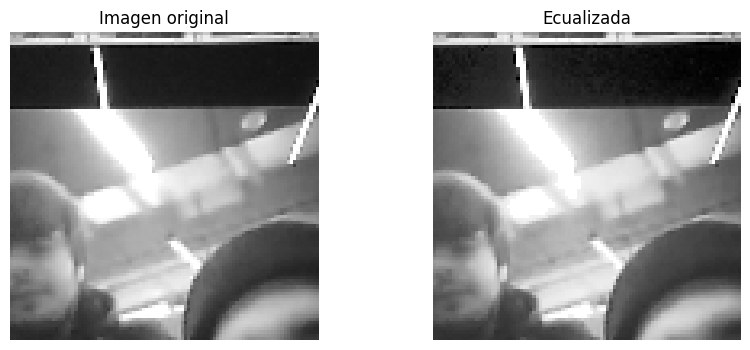

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Pega aquí tu lista de bytes


img_size = 96  # Cambia esto si usas otro tamaño

# Convierte a numpy array y reshape
img = np.array(HEXADECIMAL_BYTES, dtype=np.uint8).reshape((img_size, img_size))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

# Ecualización de histograma con OpenCV
img_eq = cv2.equalizeHist(img)

plt.subplot(1,2,2)
plt.imshow(img_eq, cmap='gray')
plt.title('Ecualizada')
plt.axis('off')
plt.show()